In [1]:
from math import exp, sqrt, pi, pow
from typing import Dict, List, Tuple, Callable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import random
from scipy import integrate, stats

from consts import default_random_seed, y1_dist_param_default, y0_dist_param_default, omega_default, beta_d_default
from sample_generation import create_sample
from strata import Strata

random.seed(default_random_seed)

# $Y(t)|X,S_t=1$


In [2]:
# sample_for_y_dist = create_sample(
#     y0_dist_param ={'a0': 0.0, 'b0': 2.0, 'c0': 100.0, 'sigma_01': 1, 'sigma_00': 1} , 
#     y1_dist_param = {'a1': 0.0, 'b1': 4.0, 'c1': 100.0, 'sigma_11': 1, 'sigma_10': 1})

sample_for_y_dist = create_sample()
print("\nExample from each strata:")
sample_for_y_dist.groupby("stratum").sample(n=3, random_state=1)


Example from each strata:


,x,t,D0,D1,stratum,S1,S0,Y0,Y1,D_obs,...,mu0,mu1,sigma_0,sigma_1,a0,b0,c0,a1,b1,c1
7918,-0.772476,0,0,0,AS,1.0,1.0,10.023207,6.979855,0,...,8.455048,6.910096,1,1,0.0,2.0,10.0,0.0,4.0,10.0
4441,0.661246,0,0,0,AS,1.0,1.0,11.454635,14.160109,0,...,11.322491,12.644982,1,1,0.0,2.0,10.0,0.0,4.0,10.0
7416,-0.390478,1,0,0,AS,1.0,1.0,10.409915,8.540856,0,...,9.219044,8.438087,1,1,0.0,2.0,10.0,0.0,4.0,10.0
3417,0.308684,1,1,1,D,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
9948,0.022873,0,1,1,D,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
5502,-0.534283,0,1,1,D,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
1133,-0.559634,1,0,1,H,NaN,0.0,-0.318115,NaN,1,...,-1.119267,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
3691,0.049471,0,0,1,H,NaN,0.0,-0.175954,NaN,0,...,0.098943,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
9260,-0.092492,0,0,1,H,NaN,0.0,0.499586,NaN,0,...,-0.184985,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
7049,-0.025835,0,1,0,P,0.0,NaN,NaN,0.104010,1,...,NaN,-0.103340,1,1,0.0,2.0,10.0,0.0,4.0,10.0


## Analyzing sample of same x

In [3]:
sample_with_same_x = create_sample(x_dist=0.2)
sample_with_same_x.groupby("stratum").sample(n=3, random_state=1)

,x,t,D0,D1,stratum,S1,S0,Y0,Y1,D_obs,...,mu0,mu1,sigma_0,sigma_1,a0,b0,c0,a1,b1,c1
7389,0.2,0,0,0,AS,1.0,1.0,9.898633,11.234435,0,...,10.4,10.8,1,1,0.0,2.0,10.0,0.0,4.0,10.0
8342,0.2,0,0,0,AS,1.0,1.0,9.264781,11.583239,0,...,10.4,10.8,1,1,0.0,2.0,10.0,0.0,4.0,10.0
9541,0.2,0,0,0,AS,1.0,1.0,11.481559,11.310918,0,...,10.4,10.8,1,1,0.0,2.0,10.0,0.0,4.0,10.0
1086,0.2,1,1,1,D,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
363,0.2,1,1,1,D,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
1959,0.2,1,1,1,D,NaN,NaN,NaN,NaN,1,...,NaN,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
3387,0.2,1,0,1,H,NaN,0.0,1.319016,NaN,1,...,0.4,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
8324,0.2,0,0,1,H,NaN,0.0,1.002863,NaN,0,...,0.4,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
7246,0.2,1,0,1,H,NaN,0.0,-1.340227,NaN,1,...,0.4,NaN,1,1,0.0,2.0,10.0,0.0,4.0,10.0
3307,0.2,0,1,0,P,0.0,NaN,NaN,-0.603840,1,...,NaN,0.8,1,1,0.0,2.0,10.0,0.0,4.0,10.0


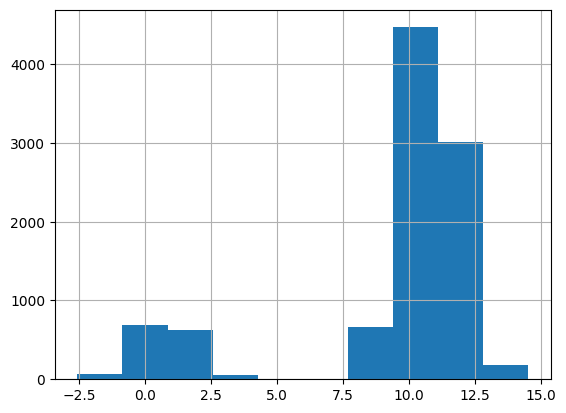

In [4]:
# sample_with_same_x.loc[sample_with_same_x.stratum==Strata.P.name]['Y1'].hist()
sample_with_same_x['Y1'].hist()

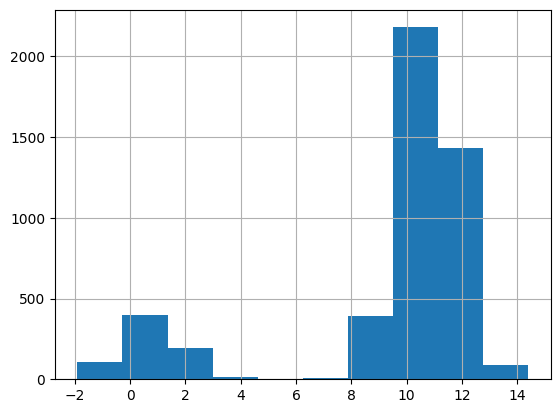

In [5]:
# sample_with_same_x.loc[(sample_with_same_x.stratum==Strata.P.name) & (sample_with_same_x.t==1) & (sample_with_same_x['D1']==0)]['Y1'].hist()
sample_with_same_x.loc[(sample_with_same_x.t==1) & (sample_with_same_x['D1']==0)]['Y1'].hist()

## True value (for known $i\in AS$):

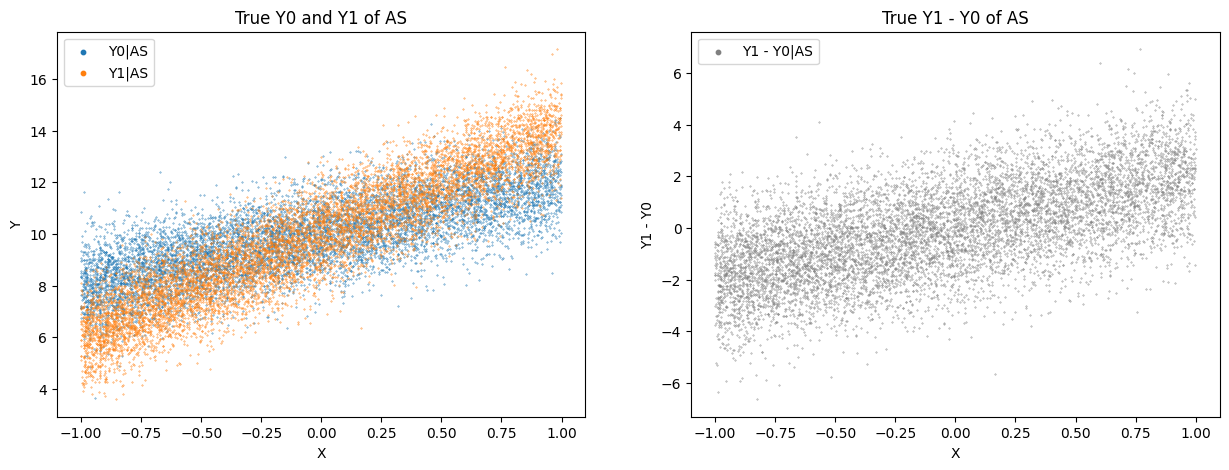

In [6]:
def plot_true_y0_y1_for_as(df: pd.DataFrame) -> None:
    df_plot_as = df.loc[df.stratum==Strata.AS.name]

    figure, ax = plt.subplots(1, 2,figsize=(15,5))
    
    ax[0].scatter(df_plot_as.x, df_plot_as.Y0, label = "Y0|AS", s=0.1)
    ax[0].scatter(df_plot_as.x, df_plot_as.Y1, label = "Y1|AS", s=0.1)
    ax[0].set_title("True Y0 and Y1 of AS")
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].legend(markerscale=10)

    ax[1].scatter(df_plot_as.x, df_plot_as.Y1 - df_plot_as.Y0, label = "Y1 - Y0|AS", s=0.1, color = "grey")
    ax[1].set_title("True Y1 - Y0 of AS")
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Y1 - Y0')
    ax[1].legend(markerscale=10)
    
    plt.show()

plot_true_y0_y1_for_as(sample_for_y_dist)

## Using observational data:

1.   Zhang & Rubin
2.   Using the parametric assumptions - Y is normal, estimate mu out of two mixed gaussians that differ by one latent variable

### 1. Zhang & Rubin

#### Non parametric

##### Non parametric helping functions

In [7]:
def calc_non_parametric_p_t0d0_p_t1d0(df: pd.DataFrame) -> Tuple[float]:
    p_t0d0 = df.loc[(df.D_obs==0) & (df.t==0)].shape[0] / df.loc[df.t==0].shape[0]
    p_t1d0 = df.loc[(df.D_obs==0) & (df.t==1)].shape[0] / df.loc[df.t==1].shape[0]
    return p_t0d0, p_t1d0

In [8]:
def get_y_0_obs_y_1_obs(df: pd.DataFrame) -> Tuple[np.ndarray]:
    y_0_obs = df.loc[df.t==0]['Y0'].dropna()
    y_1_obs = df.loc[df.t==1]['Y1'].dropna()
    return y_0_obs, y_1_obs


In [9]:
def get_q1_q2(p_t0d0: float, p_t1d0: float, pi_h: float) -> Tuple[float]:
    q1 = p_t0d0/p_t1d0-pi_h/p_t1d0
    q2 = 1-pi_h/p_t0d0
    return q1, q2

In [10]:
def calc_non_parametric_zhang_rubin_given_arg(y_0_obs: np.ndarray, y_1_obs: np.ndarray, q1: float, q2:float) ->  Tuple[float]:
    y_0_obs_sorted = np.sort(y_0_obs)
    y_1_obs_sorted = np.sort(y_1_obs)
    zhang_rubin_lb = np.average(y_1_obs_sorted[0 : round(len(y_1_obs_sorted) * q1)]) - np.average(y_0_obs_sorted[round(len(y_0_obs_sorted) * (1-q2)) : len(y_0_obs_sorted)])
    zhang_rubin_ub = np.average(y_1_obs_sorted[round(len(y_1_obs_sorted) * (1-q1)) : len(y_1_obs_sorted)]) - np.average(y_0_obs_sorted[0 : round(len(y_0_obs_sorted) * q2)])
    return zhang_rubin_lb, zhang_rubin_ub

##### Non parametric bounds

In [11]:
def calc_non_parametric_zhang_rubin(sample_df: pd.DataFrame, 
                                           plot_and_print: bool = False, 
                                           pi_h_step: float = 0.001):

    p_t0d0, p_t1d0 = calc_non_parametric_p_t0d0_p_t1d0(sample_df)
    lower_pi = max(0, p_t0d0-p_t1d0)
    upper_pi = min(p_t0d0, 1-p_t1d0)
    pi_h_list = np.arange(lower_pi, upper_pi + pi_h_step, pi_h_step)

    y_0_obs, y_1_obs = get_y_0_obs_y_1_obs(sample_df)

    # bounds
    zhang_rubin_lb_results = []
    zhang_rubin_ub_results = []
    for pi_h in pi_h_list:
        q1, q2 = get_q1_q2(p_t0d0, p_t1d0, pi_h)
        zhang_rubin_lb, zhang_rubin_ub = calc_non_parametric_zhang_rubin_given_arg(y_0_obs, y_1_obs, q1, q2)

        if plot_and_print:
            print(f"""pi_h {round(pi_h,3)}:
            Zhang and Rubin bounds are [{zhang_rubin_lb}, {zhang_rubin_ub}]
            """)
        zhang_rubin_lb_results.append(zhang_rubin_lb)
        zhang_rubin_ub_results.append(zhang_rubin_ub)

    zhang_rubin_lb = np.nanmin(zhang_rubin_lb_results)
    zhang_rubin_ub = np.nanmax(zhang_rubin_ub_results)

    return (zhang_rubin_lb, zhang_rubin_ub)


In [12]:
def non_parametric_zhang_rubin_main(df: pd.DataFrame) -> None:
    zhang_rubin_lb, zhang_rubin_ub = calc_non_parametric_zhang_rubin(sample_for_y_dist)
    print(f"Bounds by Zhang and Rubin: [{zhang_rubin_lb}, {zhang_rubin_ub}]")
    as_df = df.loc[df.stratum==Strata.AS.name]
    print(f"Actual AS treatment effect: {(as_df.Y1-as_df.Y0).mean()}")

non_parametric_zhang_rubin_main(sample_for_y_dist)

Bounds by Zhang and Rubin: [-1.963831565780759, 0.2792491148288061]
Actual AS treatment effect: -0.09352604936304877


#### Parametric

Lower bound:
$min_{\pi_h}\left[ \bar{Y}^{obs}(1)_{\left[0,\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right]} - \bar{Y}^{obs}(0)_{\left[\frac{\pi_h}{P_{T=1,D=0}},1\right]} \right]$<br>
Upper bound:
$max_{\pi_h}\left[ \bar{Y}^{obs}(1)_{\left[1-\frac{P_{T=0,D=0}}{P_{T=1,D=0}}+\frac{\pi_h}{P_{T=1,D=0}},1\right]} - \bar{Y}^{obs}(0)_{\left[0,1-\frac{\pi_h}{P_{T=1,D=0}}\right]} \right]$ <br><br>

$\bar{Y}^{obs}(1)_{\left[0,\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right]} \rightarrow \int_{\Phi_{Y_{(1)}}^{-1}(0)}^{\Phi_{Y_{(1)}}^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)} y\cdot f_{Y|X}(y|x)\,dy = \int_{\Phi_{Y_{(1)}}^{-1}(0)}^{\Phi_{Y_{(1)}}^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)} y\cdot\frac{1}{\sigma_{Y_{(1)}}\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{y-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}\right)^{\!2}\,\right)\,dy$<br><br>

$\mu_{y_{(1)}}=E[Y|T=1,X=x]$ <br>
Let us assume that: $\mu_{y_{(1)}}=E[Y|T=1,X=x]:=\bar{\beta}_0+\bar{\beta_1} x$.
Then when can estimate the $\bar{\beta}_i$s and assign this linear equation as $\mu_{y_{(1)}}$ (It didn't have to be linear, it could have been polynomila, NN, anything). <br> <br> <br>

 $\int_{\Phi^{-1}(0)}^{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)} y\cdot\frac{1}{\sigma_{Y_{(1)}}\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{y-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}\right)^{\!2}\,\right)\,dy$
  <br>
$\hat{y}=y-\mu_{Y_{(1)}} \overset{\frac{d\hat{y}}{dy}=\frac{d}{dy}(y-\mu_{Y_{(1)}})=1}{\longrightarrow} d\hat{y}=dy$
  <br><br>
$\Longrightarrow\int_{\Phi^{-1}(0)}^{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)} \overbrace{y}^{\hat{y}+\mu_{Y_{(1)}}}\cdot\frac{1}{\sigma_{Y_{(1)}}\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{\overbrace{y-\mu_{Y_{(1)}}}^{=\hat{y}}}{\sigma_{Y_{(1)}}}\right)^{\!2}\,\right)\,\overbrace{dy}^{d\hat{y}} =$
$\int_{\Phi^{-1}(0)-\mu_{Y_{(1)}}}^{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}} (\hat{y}+\mu_{Y_{(1)}})\cdot\frac{1}{\sigma_{Y_{(1)}}\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{\hat{y}}{\sigma_{Y_{(1)}}}\right)^{\!2}\,\right)\,d\hat{y} = $
$\int_{\Phi^{-1}(0)-\mu_{Y_{(1)}}}^{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}} (\hat{y}+\mu_{Y_{(1)}})\cdot\frac{1}{\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{\hat{y}}{\sigma_{Y_{(1)}}}\right)^{\!2}\,\right)\,\frac{d\hat{y}}{\sigma_{Y_{(1)}}}
$
<br><br>
$\tilde{y}=\hat{y}/\sigma_{Y_{(1)}}\overset{\frac{d\tilde{y}}{d\hat{y}}=\frac{d}{d\hat{y}}\hat{y}/\sigma_{Y_{(1)}}=1/\sigma_{Y_{(1)}}}{\longrightarrow}d\tilde{y}=\frac{d\hat{y}}{\sigma_{Y_{(1)}}}$
<br><br>
$\Longrightarrow 
\int_{\Phi^{-1}(0)-\mu_{Y_{(1)}}}^{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}} (\overbrace{\hat{y}}^{\tilde{y}\sigma_{Y_{(1)}}}+\mu_{Y_{(1)}})\cdot\frac{1}{\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\overbrace{\frac{\hat{y}}{\sigma_{Y_{(1)}}}}^{\tilde{y}}\right)^{2}\,\right)\,\overbrace{\frac{d\hat{y}}{\sigma_{Y_{(1)}}}}^{d\tilde{y}}=$
$\int_{\frac{\Phi^{-1}(0)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}}^{\frac{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}} (\tilde{y}\sigma_{Y_{(1)}}+\mu_{Y_{(1)}})\cdot\underbrace{\frac{1}{\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\tilde{y}^{2}\,\right)}_{\text{pdf of s.n.}}\,d\tilde{y}
$

<br><br><br>
$\bar{Y}^{obs}(1)_{\left[0,\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right]} \rightarrow \left(\int_{\frac{\Phi^{-1}(0)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}}^{\Phi^{-1}\frac{\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}} (\tilde{y}\sigma_{Y_{(1)}}+\mu_{Y_{(1)}})\cdot\underbrace{\varphi(\tilde{y})}_{\text{pdf of s.n.}}\,d\tilde{y} \right) $<br><br><br>

Therefor bounds are:<br>
Lower bound:
$min_{\pi_h}\left[ \left(\int_{\frac{\Phi^{-1}(0)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}}^{\frac{\Phi^{-1}\left(\frac{P_{T=0,D=0}}{P_{T=1,D=0}}-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}} (y\sigma_{Y_{(1)}}+\mu_{Y_{(1)}})\cdot\varphi(y)\,dy \right)  - \left(\int_{\frac{\Phi^{-1}\left(\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(0)}}}{\sigma_{Y_{(0)}}}}^{\frac{\Phi^{-1}(1)-\mu_{Y_{(0)}}}{\sigma_{Y_{(0)}}}} (y\sigma_{Y_{(0)}}+\mu_{Y_{(0)}})\cdot\varphi(y)\,dy \right)\right]$<br>
Upper bound:
$max_{\pi_h}\left[ \left(\int_{\frac{\Phi^{-1}\left(1-\frac{P_{T=0,D=0}}{P_{T=1,D=0}}+\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}}^{\frac{\Phi^{-1}(1)-\mu_{Y_{(1)}}}{\sigma_{Y_{(1)}}}} (y\sigma_{Y_{(1)}}+\mu_{Y_{(1)}})\cdot\varphi(y)\,dy \right)  - \left(\int_{\frac{\Phi^{-1}(0)-\mu_{Y_{(0)}}}{\sigma_{Y_{(0)}}}}^{\frac{\Phi^{-1}\left(1-\frac{\pi_h}{P_{T=1,D=0}}\right)-\mu_{Y_{(0)}}}{\sigma_{Y_{(0)}}}} (y\sigma_{Y_{(0)}}+\mu_{Y_{(0)}})\cdot\varphi(y)\,dy \right) \right]$
<br><br><br>

$P_{T=0,D=0}=\frac{\#\{D_i=0 \& T_i=0\}}{\#\{T_i=0\}}=p(D_i=0|T_i=0, X=x)= 1- \frac{1}{1+\exp\{(-{\beta_D}^\top [1,t=0,x])\}}=1- \frac{1}{1+\exp\{(-\beta_0-\beta_2x)\}}$<br>
$P_{T=1,D=0}=\frac{\#\{D_i=0 \& T_i=1\}}{\#\{T_i=1\}}=p(D_i=0|T_i=1, X=x)= 1- \frac{1}{1+\exp\{(-{\beta_D}^\top [1,t=1,x])\}}=1- \frac{1}{1+\exp\{(-\beta_0-\beta_1-\beta_2x)\}}$<br>
$\pi_h: \max\left(0,\overbrace{1-\frac{1}{1+\exp\{(-\beta_0-\beta_2x)\}}}^{P_{T=0,D=0}} - \overbrace{1- \frac{1}{1+\exp\{(-\beta_0-\beta_1-\beta_2x)\}}}^{P_{P_{T=1,D=0}}}\right)  \leq\pi_h\leq  \min\left(\overbrace{1-\frac{1}{1+\exp\{(-\beta_0-\beta_2x)\}}}^{P_{T=0,D=0}}, 1- \left( \overbrace{1- \frac{1}{1+\exp\{(-\beta_0-\beta_1-\beta_2x)\}}}^{P_{T=1,D=0}}\right)\right)$

##### Parametric helping functions

In [13]:
def calculate_integral(func, lower_limit_integration, upper_limit_integration):
    integral_result, estimate_absolute_error = integrate.quad(func, lower_limit_integration, upper_limit_integration)
    return integral_result

In [14]:
## PLOTS ##
def plot_integrand_function(y_phi: Callable[[float], float], pi_h_step: float):
    min_y_phi, max_y_phi = -7.5, 7.5
    y_values, y_phi_values = zip(*[(y, y_phi(y)) for y in np.arange(min_y_phi, max_y_phi, pi_h_step)])
    plt.figure(figsize=(15, 3))
    plt.title (r'Plot of the integrand $y\cdot\varphi(y)$')
    plt.xlabel(r'$y$')
    plt.ylabel(r'$y\cdot\varphi(y)$')
    plt.plot(y_values, y_phi_values)
    plt.show()

def plot_pi_h(lower_pi: float, upper_pi: float):
    plt.plot((lower_pi,upper_pi),(1,1),'ro-',color='orange')
    plt.annotate(r'$max(0,P_{T=0,D=0}-P_{T=1,D=0})$', (lower_pi,1.005))
    plt.annotate(round(lower_pi,3), (lower_pi,1))
    plt.annotate(r'$min(P_{T=0,D=0},1-P_{T=1,D=0})$', (upper_pi,1.005))
    plt.annotate(round(upper_pi,3), (upper_pi,1))
    plt.xlim(lower_pi-0.005, upper_pi+0.005)
    plt.yticks([])
    axes = plt.gca()
    plt.box(False)
    plt.xlabel(r'$\pi_h$')
    plt.show()

def plot_pi_h_and_bounds(pi_h: List[float], zhang_rubin_lb: List[float], zhang_rubin_ub: List[float]):
    plt.scatter(pi_h, zhang_rubin_lb, label = "zhang_rubin_lb" , s=2.5)
    plt.scatter(pi_h, zhang_rubin_ub, label = "zhang_rubin_ub", s=2.5)
    # plt.legend(markerscale=10)
    plt.legend()
    plt.title (r"Grid search of $\pi_h$ and Zhang & Rubin's")
    plt.xlabel(r'$\pi_h$')
    plt.ylabel(r'Zhang & Rubin Bounds')
    plt.show()


##### $\Phi^{-1}(\alpha)=P(Y<F^{-1}(\alpha))$, where $F^{-1}(\alpha)$ is the $\alpha$ quantile of $Y$. <br>
First we'll calculate the quantile using binary search, and then we'll calculate the cdf of that quantile.

In [15]:
def continuous_bisect_fun_left(f, v, lo, hi):
    # Return the smallest value x between lo and hi such that f(x) >= v
    val_range = [lo, hi]
    k = 0.5 * sum(val_range)
    for i in range(32): #TODO WHY 32
        val_range[int(f(k) > v)] = k
        next_k = 0.5 * sum(val_range)
        if next_k == k:
            break
        k = next_k
    return k

def get_mixture_cdf(component_distributions, ps):
    # Return the function that is the cdf of the mixture distribution
    return lambda x: sum(component_dist.cdf(x) * p for component_dist, p in zip(component_distributions, ps))

def mixture_quantile(p, component_distributions, ps):
    # Return the pth quantile of the mixture distribution given by the component distributions and their probabilities
    mixture_cdf = get_mixture_cdf(component_distributions, ps)

    lo = np.min([dist.ppf(p) for dist in component_distributions])
    hi = np.max([dist.ppf(p) for dist in component_distributions])

    return continuous_bisect_fun_left(mixture_cdf, p, lo, hi)

def cdf_of_mixture_of_quantile(f1, f2, quantile, weight):
    ps_component1 = f1.cdf(quantile)
    ps_component2 = f2.cdf(quantile)
    ps_mixture = weight * ps_component1 + (1-weight) * ps_component2
    return ps_mixture


def get_ndtri_of_mix(alpha, component_distributions, ps, weight):
    quantile = mixture_quantile(alpha, component_distributions, ps)
    ndtri_mix = cdf_of_mixture_of_quantile(component_distributions[0], component_distributions[0], quantile, weight)
    return ndtri_mix

In [16]:
def calculate_integral_bounds(component_distributions, weight, ps, alpha_list, mu, sigma):
    argmt_integral_list = []
    for alpha in alpha_list:
        if alpha == 0:
            ndtri_mix = 0.0 # alpha=0 -> quantile=-inf -> ndtri=0
        elif alpha == 1:
            ndtri_mix = 1.0 # alpha=1 -> quantile=inf -> ndtri=1
        else:
            ndtri_mix = get_ndtri_of_mix(alpha, component_distributions, ps, weight)
        argmt_integral_list.append((ndtri_mix-mu)/sigma)
    return argmt_integral_list

##### Parametric bounds calculation function

In [17]:
def calc_zhang_rubin_bounds_per_x(
    x: float, mu_y_0_x: float, mu_y_1_x: float, sigma_0: float, sigma_1:float,
    a0: float, b0: float, c0: float, a1: float, b1: float, c1: float,
    beta_d: List[float], plot_and_print: bool = False, pi_h_step: float = 0.001,
    calc_non_parametric = False) -> Tuple[float, float]:

    beta_d0, beta_d1, beta_d2 = beta_d
    # print(f"mu0: {mu_y_0_x}, mu1: {mu_y_1_x}, sigma0: {sigma_0}, sigma1: {sigma_1}, beta: {beta_d}")

    # pi
    p_t0d0 = 1-1/(1+exp(-beta_d0-beta_d2*x))
    p_t1d0 = 1-1/(1+exp(-beta_d0-beta_d1-beta_d2*x))
    lower_pi = max(0, p_t0d0-p_t1d0)
    upper_pi = min(p_t0d0, 1-p_t1d0)
    pi_h_list = np.arange(lower_pi, upper_pi + pi_h_step, pi_h_step)
    if plot_and_print:
        plot_pi_h(lower_pi, upper_pi)

    # bounds
    zhang_rubin_lb_results = []
    zhang_rubin_ub_results = []
    zhang_rubin_lb_non_parametric_results = []
    zhang_rubin_ub_non_parametric_results = []
    for pi_h in pi_h_list:
        # integrals = {
        # 'lb_frst_argmt_integral': {'lb': (special.ndtri(0)-mu_y_1_x)/sigma_1, 'ub': (special.ndtri(p_t0d0/p_t1d0-pi_h/p_t1d0)-mu_y_1_x)/sigma_1, 'mu':mu_y_1_x , 'sigma':sigma_1},
        # 'lb_scnd_argmt_integral': {'lb': (special.ndtri(pi_h/p_t1d0)-mu_y_0_x)/sigma_0, 'ub': (special.ndtri(1)-mu_y_0_x)/sigma_0, 'mu':mu_y_0_x , 'sigma':sigma_0}, #for pi_h=0, this is integral from phi(one) to phi(one)-> from inf to inf, returns nan
        # 'ub_frst_argmt_integral': {'lb': (special.ndtri(1-p_t0d0/p_t1d0+pi_h/p_t1d0)-mu_y_1_x)/sigma_1,'ub': (special.ndtri(1)-mu_y_1_x)/sigma_1, 'mu':mu_y_1_x , 'sigma':sigma_1},
        # 'ub_scnd_argmt_integral': {'lb': (special.ndtri(0)-mu_y_0_x)/sigma_0,'ub': (special.ndtri(1-pi_h/p_t1d0)-mu_y_0_x)/sigma_0, 'mu':mu_y_0_x , 'sigma':sigma_0}
        # }


        # Y1
        mu_1_as = a1 + b1*x + c1
        mu_1_p = a1 + b1*x
        # QUESTION: Where do we account for the fact that this x resulted in EITHER AS or P? we don't have another x like this with the opposite strata. We are taking weighted average but where does the probability of being AS/P - in terms of Beta - is addressed?

        f1 = stats.norm(loc=mu_1_as, scale=sigma_1)
        f2 = stats.norm(loc=mu_1_p, scale=sigma_1)
        component_distributions = [f1,f2]
        weight = p_t0d0/p_t1d0-pi_h/p_t1d0
        ps = [weight, 1-weight]
        alpha_list = [0, p_t0d0/p_t1d0-pi_h/p_t1d0, 1-p_t0d0/p_t1d0+pi_h/p_t1d0, 1]
        
        frst_argmt_integral_list = calculate_integral_bounds(component_distributions, weight, ps, alpha_list, mu_y_1_x, sigma_1)
        lb_frst_argmt_integral_lb, lb_frst_argmt_integral_ub, ub_frst_argmt_integral_lb, ub_frst_argmt_integral_ub = frst_argmt_integral_list


        # Y0
        mu_0_as = a0 + b0*x + c0
        mu_0_h = a0 + b0*x
        # QUESTION: Where do we account for the fact that this x resulted in EITHER AS or P? we don't have another x like this with the opposite strata. We are taking weighted average but where does the probability of being AS/P - in terms of Beta - is addressed?

        f1 = stats.norm(loc=mu_0_as, scale=sigma_0)
        f2 = stats.norm(loc=mu_0_h, scale=sigma_0)
        component_distributions = [f1,f2]
        weight = p_t0d0-pi_h/p_t0d0
        ps = [weight, 1-weight]
        alpha_list = [pi_h/p_t1d0, 1, 0, 1-pi_h/p_t1d0]

        scnd_argmt_integral_list = calculate_integral_bounds(component_distributions, weight, ps, alpha_list, mu_y_0_x, sigma_0)
        lb_scnd_argmt_integral_lb, lb_scnd_argmt_integral_ub, ub_scnd_argmt_integral_lb, ub_scnd_argmt_integral_ub = scnd_argmt_integral_list



        integrals = {
        'lb_frst_argmt_integral': {'lb': lb_frst_argmt_integral_lb, 'ub': lb_frst_argmt_integral_ub, 'mu':mu_y_1_x , 'sigma':sigma_1},
        'lb_scnd_argmt_integral': {'lb': lb_scnd_argmt_integral_lb, 'ub': lb_scnd_argmt_integral_ub, 'mu':mu_y_0_x , 'sigma':sigma_0},
        'ub_frst_argmt_integral': {'lb': ub_frst_argmt_integral_lb, 'ub': ub_frst_argmt_integral_ub, 'mu':mu_y_1_x , 'sigma':sigma_1},
        'ub_scnd_argmt_integral': {'lb': ub_scnd_argmt_integral_lb, 'ub': ub_scnd_argmt_integral_ub, 'mu':mu_y_0_x , 'sigma':sigma_0}
        }



        for k in integrals.keys():
            lb = integrals[k]['lb']
            ub = integrals[k]['ub']
            integrals[k]['result'] = calculate_integral(lambda y: (y * integrals[k]['sigma'] + integrals[k]['mu']) * 1/(sqrt(2*pi)) * exp(-1/2 * pow(y,2)), lb, ub) # if lb!=ub else 0
            
        
        zhang_rubin_lb = integrals['lb_frst_argmt_integral']['result'] - integrals['lb_scnd_argmt_integral']['result']
        zhang_rubin_ub = integrals['ub_frst_argmt_integral']['result'] - integrals['ub_scnd_argmt_integral']['result']
        if plot_and_print:
            print(f"""pi_h {round(pi_h,3)}:
            LB: 1st intagral: {round(integrals['lb_frst_argmt_integral']['lb'],2)} to {round(integrals['lb_frst_argmt_integral']['ub'],2)}. 2nd intagral: {integrals['lb_scnd_argmt_integral']['lb']} to {round(integrals['lb_scnd_argmt_integral']['ub'],2)}.
            UB: 1st intagral: {round(integrals['ub_frst_argmt_integral']['lb'],2)} to {round(integrals['ub_frst_argmt_integral']['ub'],2)}. 2nd intagral: {integrals['ub_scnd_argmt_integral']['lb']} to {round(integrals['ub_scnd_argmt_integral']['ub'],2)}. 
            Zhang and Rubin bounds are [{zhang_rubin_lb}, {zhang_rubin_ub}]
            """)
        zhang_rubin_lb_results.append(zhang_rubin_lb)
        zhang_rubin_ub_results.append(zhang_rubin_ub)


    zhang_rubin_lb = np.nanmin(zhang_rubin_lb_results)
    zhang_rubin_ub = np.nanmax(zhang_rubin_ub_results)
    
    if plot_and_print:
        print(f"mu_y_1_x-mu_y_0_x: {mu_y_1_x-mu_y_0_x}")
        print(f"Zhang and Rubins bounds: [{zhang_rubin_lb}, {zhang_rubin_ub}]")
        if calc_non_parametric:
            zhang_rubin_lb_non_parametric, zhang_rubin_ub_non_parametric = calc_non_parametric_zhang_rubin(create_sample(x_dist=x))
            print(f"Zhang and Rubins non parametric bounds: [{zhang_rubin_lb_non_parametric}, {zhang_rubin_ub_non_parametric}]")
        plot_pi_h_and_bounds(pi_h_list, zhang_rubin_lb_results, zhang_rubin_ub_results)
    
    return (zhang_rubin_lb, zhang_rubin_ub) 

##### For 40 samples, plot $\pi_h$, parametric bounds for each $\pi_h$, final parametric and non parametric bounds

x is: -0.95


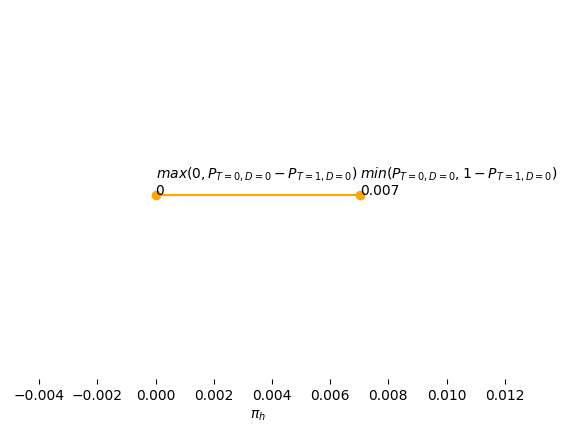

pi_h 0.0:
            LB: 1st intagral: -6.21 to -5.25. 2nd intagral: -8.102969638988865 to -7.1.
            UB: 1st intagral: -6.21 to -5.21. 2nd intagral: -8.102969638988865 to -7.1. 
            Zhang and Rubin bounds are [5.878210537336672e-08, 7.917922280939779e-08]
            
pi_h 0.001:
            LB: 1st intagral: -6.21 to -5.25. 2nd intagral: -8.102969638988865 to -7.1.
            UB: 1st intagral: -6.21 to -5.21. 2nd intagral: -8.102969638988865 to -7.1. 
            Zhang and Rubin bounds are [5.835168035289163e-08, 7.917922747848919e-08]
            
pi_h 0.002:
            LB: 1st intagral: -6.21 to -5.25. 2nd intagral: -8.102969638988865 to -7.1.
            UB: 1st intagral: -6.21 to -5.21. 2nd intagral: -8.102969638988865 to -7.11. 
            Zhang and Rubin bounds are [5.7923332054745296e-08, 7.917923211783195e-08]
            
pi_h 0.003:
            LB: 1st intagral: -6.21 to -5.25. 2nd intagral: -8.102969638988865 to -7.1.
            UB: 1st intagral: -6.21 

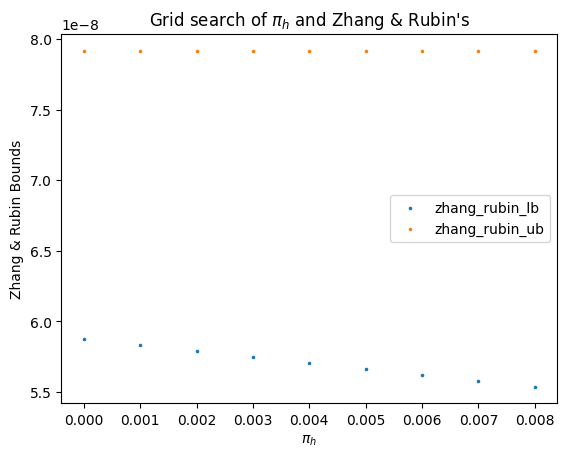

x is: -0.94


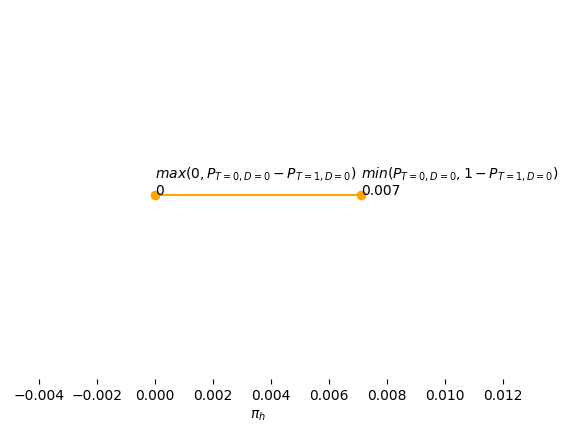

pi_h 0.0:
            LB: 1st intagral: -6.25 to -5.29. 2nd intagral: -8.123298474797481 to -7.12.
            UB: 1st intagral: -6.25 to -5.25. 2nd intagral: -8.123298474797481 to -7.12. 
            Zhang and Rubin bounds are [4.70284149073775e-08, 6.365087772814524e-08]
            
pi_h 0.001:
            LB: 1st intagral: -6.25 to -5.29. 2nd intagral: -8.123298474797481 to -7.12.
            UB: 1st intagral: -6.25 to -5.25. 2nd intagral: -8.123298474797481 to -7.12. 
            Zhang and Rubin bounds are [4.6681707358325956e-08, 6.36508817709202e-08]
            
pi_h 0.002:
            LB: 1st intagral: -6.25 to -5.29. 2nd intagral: -8.123298474797481 to -7.12.
            UB: 1st intagral: -6.25 to -5.25. 2nd intagral: -8.123298474797481 to -7.13. 
            Zhang and Rubin bounds are [4.633669046254781e-08, 6.365088578783884e-08]
            
pi_h 0.003:
            LB: 1st intagral: -6.25 to -5.3. 2nd intagral: -8.123298474797481 to -7.12.
            UB: 1st intagral: -6.

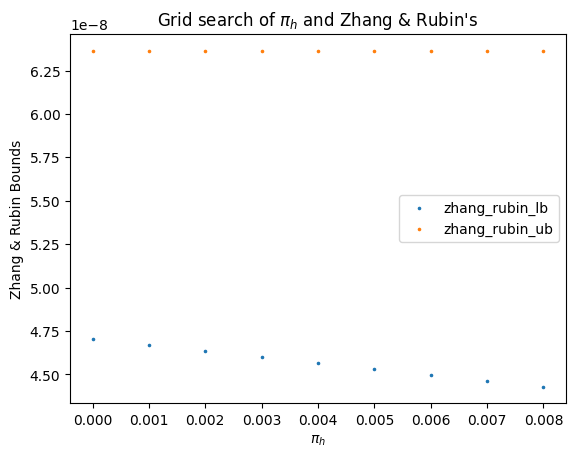

x is: -0.94


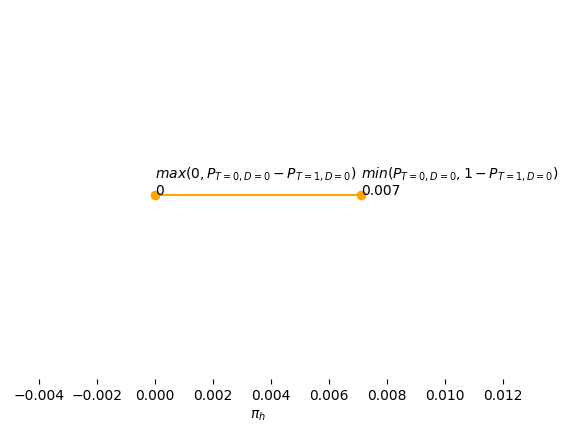

pi_h 0.0:
            LB: 1st intagral: -6.25 to -5.29. 2nd intagral: -8.123823163677374 to -7.12.
            UB: 1st intagral: -6.25 to -5.25. 2nd intagral: -8.123823163677374 to -7.12. 
            Zhang and Rubin bounds are [4.675736338504872e-08, 6.329189368571583e-08]
            
pi_h 0.001:
            LB: 1st intagral: -6.25 to -5.29. 2nd intagral: -8.123823163677374 to -7.12.
            UB: 1st intagral: -6.25 to -5.25. 2nd intagral: -8.123823163677374 to -7.12. 
            Zhang and Rubin bounds are [4.641259379869044e-08, 6.329189771346834e-08]
            
pi_h 0.002:
            LB: 1st intagral: -6.25 to -5.3. 2nd intagral: -8.123823163677374 to -7.12.
            UB: 1st intagral: -6.25 to -5.25. 2nd intagral: -8.123823163677374 to -7.13. 
            Zhang and Rubin bounds are [4.606950579704463e-08, 6.329190171545734e-08]
            
pi_h 0.003:
            LB: 1st intagral: -6.25 to -5.3. 2nd intagral: -8.123823163677374 to -7.12.
            UB: 1st intagral: -6.

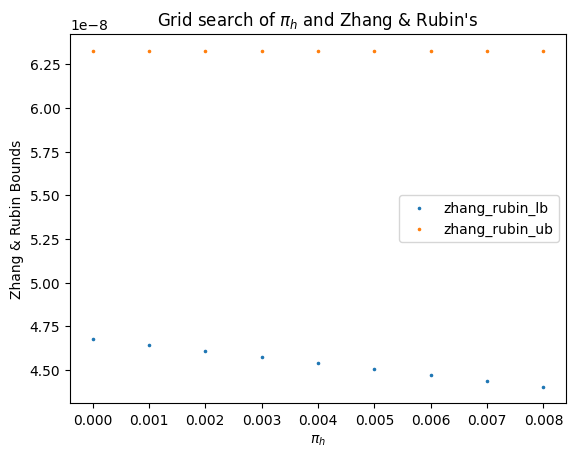

x is: -0.9


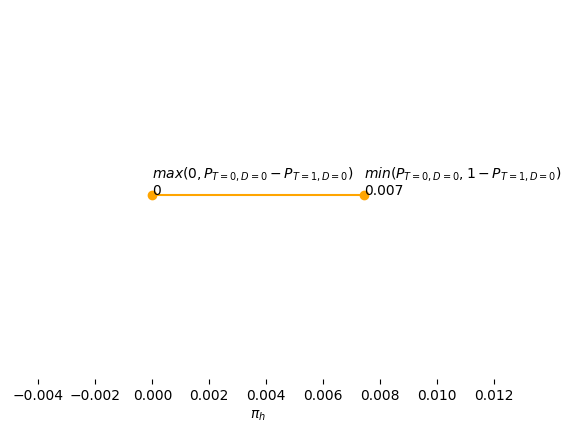

pi_h 0.0:
            LB: 1st intagral: -6.42 to -5.46. 2nd intagral: -8.20828962488508 to -7.21.
            UB: 1st intagral: -6.42 to -5.42. 2nd intagral: -8.20828962488508 to -7.21. 
            Zhang and Rubin bounds are [1.8169426869786604e-08, 2.510706139543154e-08]
            
pi_h 0.001:
            LB: 1st intagral: -6.42 to -5.47. 2nd intagral: -8.20828962488508 to -7.21.
            UB: 1st intagral: -6.42 to -5.42. 2nd intagral: -8.20828962488508 to -7.21. 
            Zhang and Rubin bounds are [1.803164561872277e-08, 2.5107063599578874e-08]
            
pi_h 0.002:
            LB: 1st intagral: -6.42 to -5.47. 2nd intagral: -8.20828962488508 to -7.21.
            UB: 1st intagral: -6.42 to -5.42. 2nd intagral: -8.20828962488508 to -7.21. 
            Zhang and Rubin bounds are [1.7894565873230395e-08, 2.51070657894049e-08]
            
pi_h 0.003:
            LB: 1st intagral: -6.42 to -5.47. 2nd intagral: -8.20828962488508 to -7.21.
            UB: 1st intagral: -6.42 

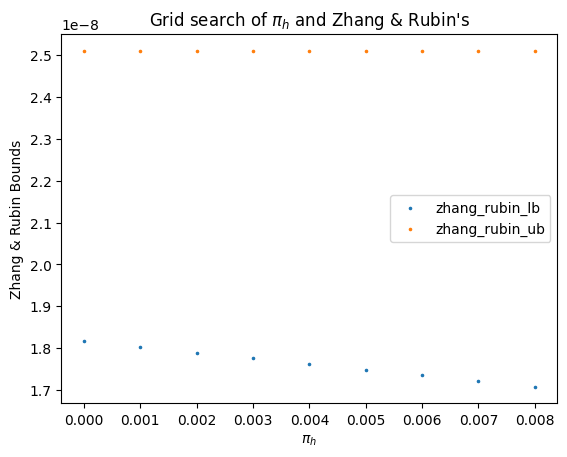

x is: -0.88
** including the non parametric bounds **


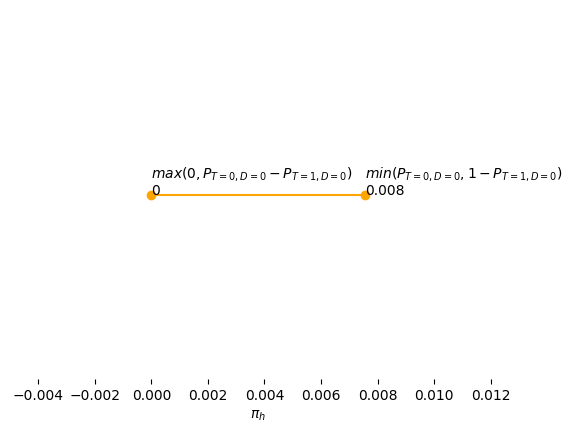

pi_h 0.0:
            LB: 1st intagral: -6.48 to -5.53. 2nd intagral: -8.241069561158243 to -7.24.
            UB: 1st intagral: -6.48 to -5.48. 2nd intagral: -8.241069561158243 to -7.24. 
            Zhang and Rubin bounds are [1.2491265575944818e-08, 1.740523094475436e-08]
            
pi_h 0.001:
            LB: 1st intagral: -6.48 to -5.53. 2nd intagral: -8.241069561158243 to -7.24.
            UB: 1st intagral: -6.48 to -5.48. 2nd intagral: -8.241069561158243 to -7.24. 
            Zhang and Rubin bounds are [1.239551497252347e-08, 1.7405232685796636e-08]
            
pi_h 0.002:
            LB: 1st intagral: -6.48 to -5.53. 2nd intagral: -8.241069561158243 to -7.24.
            UB: 1st intagral: -6.48 to -5.48. 2nd intagral: -8.241069561158243 to -7.24. 
            Zhang and Rubin bounds are [1.2300259927323001e-08, 1.740523441545768e-08]
            
pi_h 0.003:
            LB: 1st intagral: -6.48 to -5.53. 2nd intagral: -8.241069561158243 to -7.24.
            UB: 1st intagral

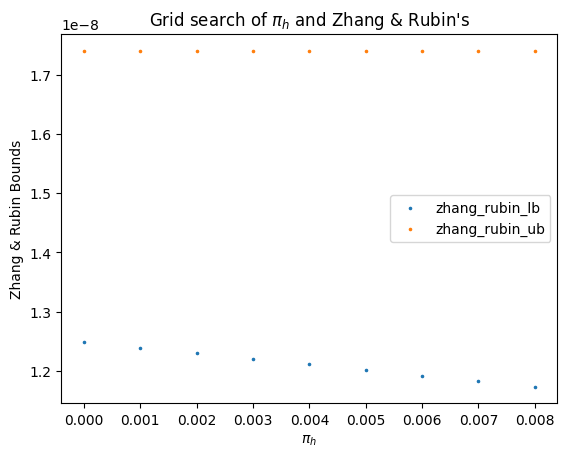

x is: -0.6


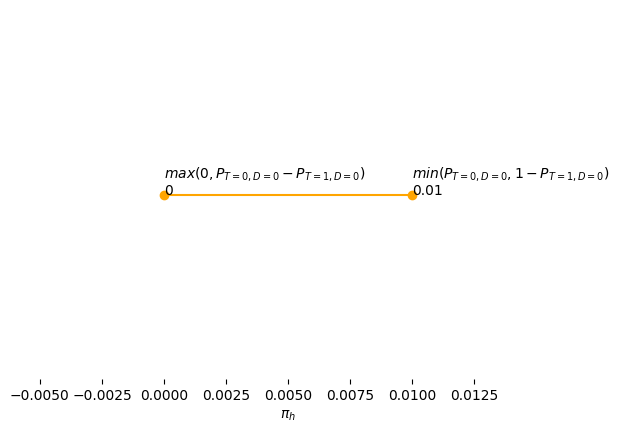

pi_h 0.0:
            LB: 1st intagral: -7.61 to -6.67. 2nd intagral: -8.804691868455603 to -7.8.
            UB: 1st intagral: -7.61 to -6.61. 2nd intagral: -8.804691868455603 to -7.8. 
            Zhang and Rubin bounds are [9.922398244257549e-12, 1.6496295736270075e-11]
            
pi_h 0.001:
            LB: 1st intagral: -7.61 to -6.67. 2nd intagral: -8.804691868455603 to -7.8.
            UB: 1st intagral: -7.61 to -6.61. 2nd intagral: -8.804691868455603 to -7.81. 
            Zhang and Rubin bounds are [9.831363372227914e-12, 1.6496321306726068e-11]
            
pi_h 0.002:
            LB: 1st intagral: -7.61 to -6.68. 2nd intagral: -8.804691868455603 to -7.8.
            UB: 1st intagral: -7.61 to -6.61. 2nd intagral: -8.804691868455603 to -7.81. 
            Zhang and Rubin bounds are [9.740938069076328e-12, 1.6496346691999156e-11]
            
pi_h 0.003:
            LB: 1st intagral: -7.61 to -6.68. 2nd intagral: -8.804691868455603 to -7.8.
            UB: 1st intagral: -7.

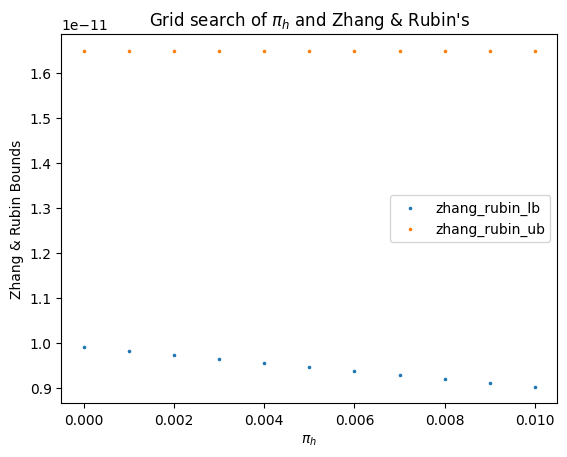

x is: -0.55


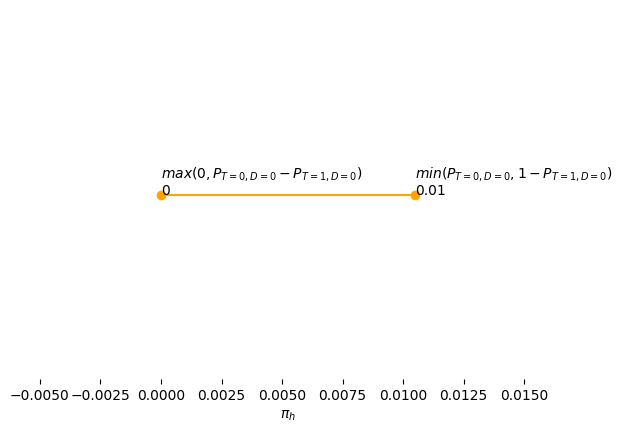

pi_h 0.0:
            LB: 1st intagral: -7.81 to -6.88. 2nd intagral: -8.904501324998687 to -7.9.
            UB: 1st intagral: -7.81 to -6.81. 2nd intagral: -8.904501324998687 to -7.9. 
            Zhang and Rubin bounds are [2.4411773356064907e-12, 4.219608308708471e-12]
            
pi_h 0.001:
            LB: 1st intagral: -7.81 to -6.88. 2nd intagral: -8.904501324998687 to -7.9.
            UB: 1st intagral: -7.81 to -6.81. 2nd intagral: -8.904501324998687 to -7.91. 
            Zhang and Rubin bounds are [2.418072839105167e-12, 4.219620030606019e-12]
            
pi_h 0.002:
            LB: 1st intagral: -7.81 to -6.88. 2nd intagral: -8.904501324998687 to -7.9.
            UB: 1st intagral: -7.81 to -6.81. 2nd intagral: -8.904501324998687 to -7.91. 
            Zhang and Rubin bounds are [2.3951296771639565e-12, 4.219631666081383e-12]
            
pi_h 0.003:
            LB: 1st intagral: -7.81 to -6.88. 2nd intagral: -8.904501324998687 to -7.9.
            UB: 1st intagral: -7.8

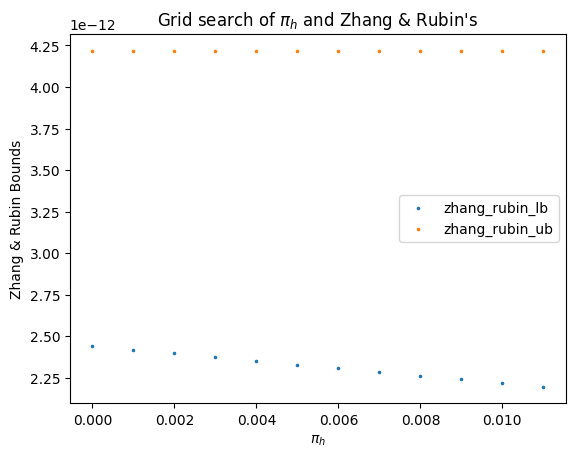

x is: -0.5


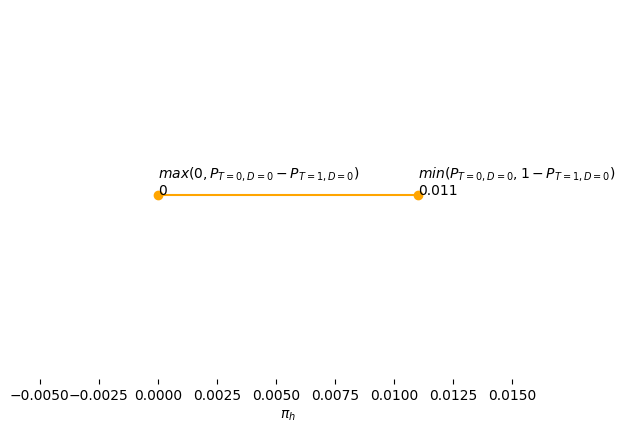

pi_h 0.0:
            LB: 1st intagral: -8.01 to -7.08. 2nd intagral: -9.005230748568627 to -8.01.
            UB: 1st intagral: -8.01 to -7.01. 2nd intagral: -9.005230748568627 to -8.01. 
            Zhang and Rubin bounds are [5.680506287467813e-13, 1.0240801569610745e-12]
            
pi_h 0.001:
            LB: 1st intagral: -8.01 to -7.08. 2nd intagral: -9.005230748568627 to -8.01.
            UB: 1st intagral: -8.01 to -7.01. 2nd intagral: -9.005230748568627 to -8.01. 
            Zhang and Rubin bounds are [5.62502736361248e-13, 1.0240854393876043e-12]
            
pi_h 0.002:
            LB: 1st intagral: -8.01 to -7.08. 2nd intagral: -9.005230748568627 to -8.01.
            UB: 1st intagral: -8.01 to -7.01. 2nd intagral: -9.005230748568627 to -8.01. 
            Zhang and Rubin bounds are [5.56995227138527e-13, 1.0240906821608752e-12]
            
pi_h 0.003:
            LB: 1st intagral: -8.01 to -7.08. 2nd intagral: -9.005230748568627 to -8.01.
            UB: 1st intagral: 

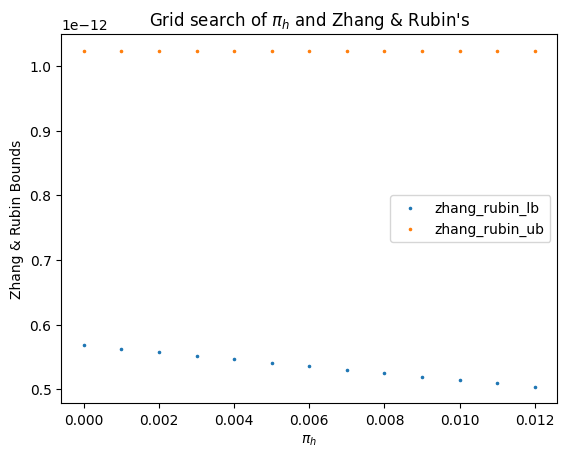

x is: -0.42


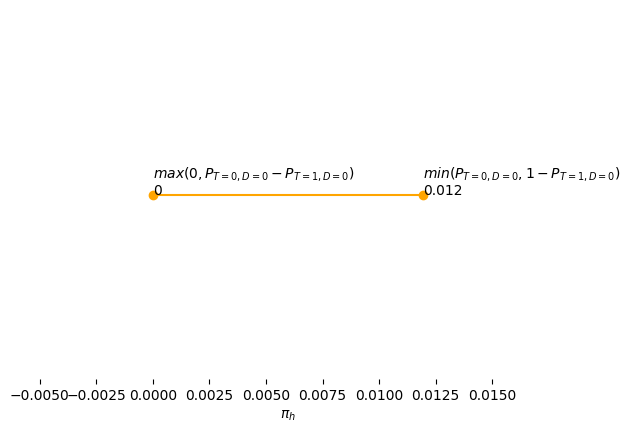

pi_h 0.0:
            LB: 1st intagral: -8.34 to -7.41. 2nd intagral: -9.167644693991228 to -8.17.
            UB: 1st intagral: -8.34 to -7.34. 2nd intagral: -9.167644693991228 to -8.17. 
            Zhang and Rubin bounds are [4.9382481932893687e-14, 9.592129781423437e-14]
            
pi_h 0.001:
            LB: 1st intagral: -8.34 to -7.41. 2nd intagral: -9.167644693991228 to -8.17.
            UB: 1st intagral: -8.34 to -7.34. 2nd intagral: -9.167644693991228 to -8.17. 
            Zhang and Rubin bounds are [4.887468658131636e-14, 9.59227286635151e-14]
            
pi_h 0.002:
            LB: 1st intagral: -8.34 to -7.41. 2nd intagral: -9.167644693991228 to -8.17.
            UB: 1st intagral: -8.34 to -7.34. 2nd intagral: -9.167644693991228 to -8.17. 
            Zhang and Rubin bounds are [4.8370837564261225e-14, 9.592414845628063e-14]
            
pi_h 0.003:
            LB: 1st intagral: -8.34 to -7.42. 2nd intagral: -9.167644693991228 to -8.17.
            UB: 1st intagral: 

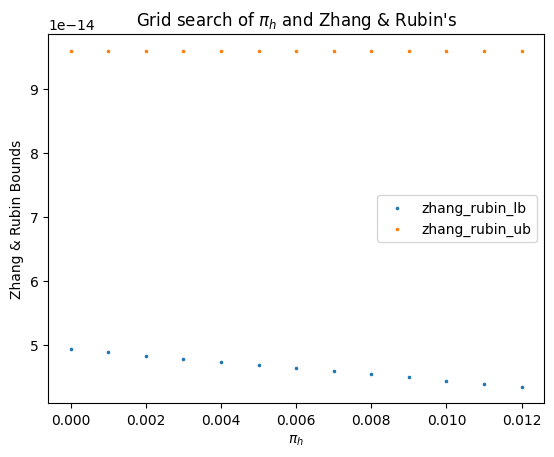

x is: -0.25


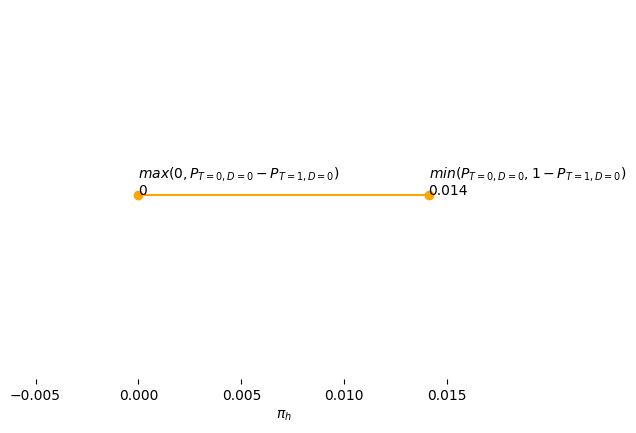

pi_h 0.0:
            LB: 1st intagral: -9.01 to -8.1. 2nd intagral: -9.503553140583078 to -8.5.
            UB: 1st intagral: -9.01 to -8.01. 2nd intagral: -9.503553140583078 to -8.5. 
            Zhang and Rubin bounds are [2.1416364572584048e-16, 5.078587350511255e-16]
            
pi_h 0.001:
            LB: 1st intagral: -9.01 to -8.1. 2nd intagral: -9.503553140583078 to -8.5.
            UB: 1st intagral: -9.01 to -8.01. 2nd intagral: -9.503553140583078 to -8.5. 
            Zhang and Rubin bounds are [2.1163927988466465e-16, 5.079472208426356e-16]
            
pi_h 0.002:
            LB: 1st intagral: -9.01 to -8.1. 2nd intagral: -9.503553140583078 to -8.5.
            UB: 1st intagral: -9.01 to -8.01. 2nd intagral: -9.503553140583078 to -8.51. 
            Zhang and Rubin bounds are [2.0913727205103286e-16, 5.080349806710547e-16]
            
pi_h 0.003:
            LB: 1st intagral: -9.01 to -8.1. 2nd intagral: -9.503553140583078 to -8.5.
            UB: 1st intagral: -9.01 to

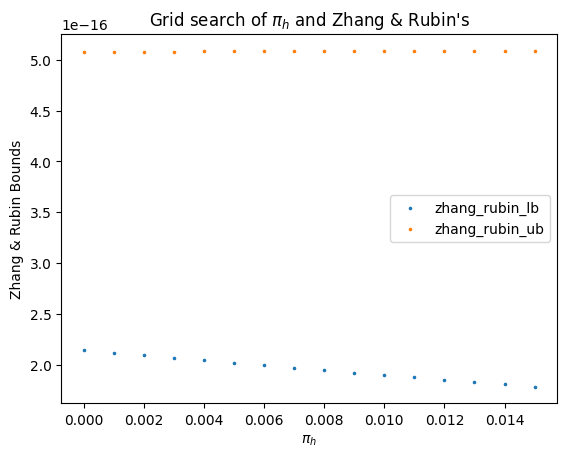

x is: -0.25


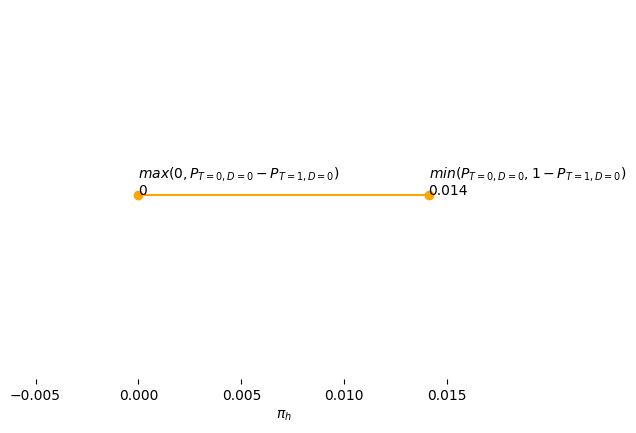

pi_h 0.0:
            LB: 1st intagral: 0.99 to 1.9. 2nd intagral: nan to nan.
            UB: 1st intagral: 0.99 to 1.99. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            


/Users/hadarrosenwald/Downloads/technion/thesis/competing_risks_simulation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


pi_h 0.001:
            LB: 1st intagral: 0.99 to 1.9. 2nd intagral: nan to nan.
            UB: 1st intagral: 0.99 to 1.99. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.002:
            LB: 1st intagral: 0.99 to 1.9. 2nd intagral: nan to nan.
            UB: 1st intagral: 0.99 to 1.99. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.003:
            LB: 1st intagral: 0.99 to 1.9. 2nd intagral: nan to nan.
            UB: 1st intagral: 0.99 to 1.99. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.004:
            LB: 1st intagral: 0.99 to 1.9. 2nd intagral: nan to nan.
            UB: 1st intagral: 0.99 to 1.99. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.005:
            LB: 1st intagral: 0.99 to 1.89. 2nd intagral: nan to nan.
            UB: 1st intagral: 0.99 to 1.99. 2nd intagral: 

/Users/hadarrosenwald/Downloads/technion/thesis/competing_risks_simulation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: All-NaN axis encountered
/Users/hadarrosenwald/Downloads/technion/thesis/competing_risks_simulation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: All-NaN axis encountered


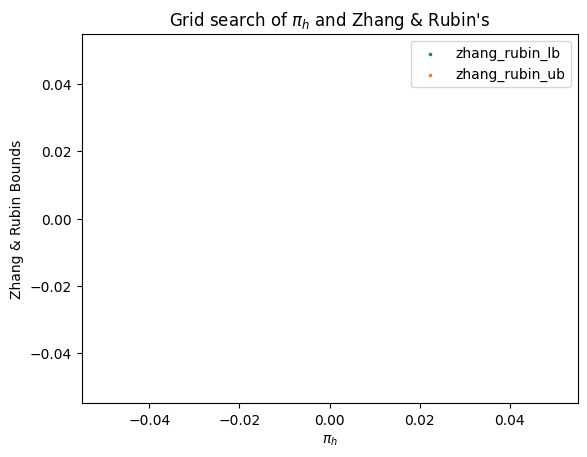

x is: -0.24


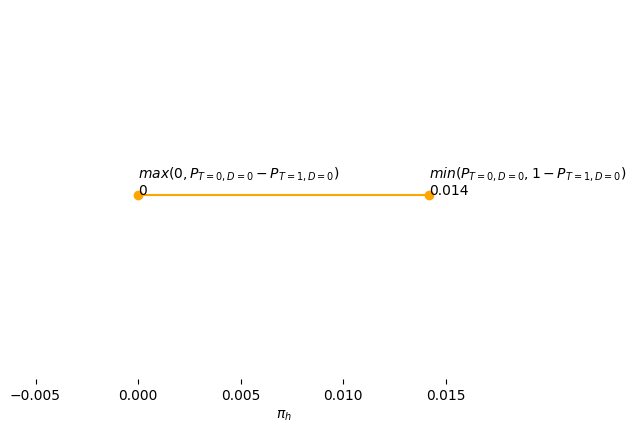

pi_h 0.0:
            LB: 1st intagral: -9.03 to -8.12. 2nd intagral: -9.51582363925003 to -8.52.
            UB: 1st intagral: -9.03 to -8.03. 2nd intagral: -9.51582363925003 to -8.52. 
            Zhang and Rubin bounds are [1.7346708896683555e-16, 4.154030937526792e-16]
            
pi_h 0.001:
            LB: 1st intagral: -9.03 to -8.12. 2nd intagral: -9.51582363925003 to -8.52.
            UB: 1st intagral: -9.03 to -8.03. 2nd intagral: -9.51582363925003 to -8.52. 
            Zhang and Rubin bounds are [1.7140646421450657e-16, 4.1548285909388106e-16]
            
pi_h 0.002:
            LB: 1st intagral: -9.03 to -8.12. 2nd intagral: -9.51582363925003 to -8.52.
            UB: 1st intagral: -9.03 to -8.03. 2nd intagral: -9.51582363925003 to -8.52. 
            Zhang and Rubin bounds are [1.6936417512005353e-16, 4.1556196857993183e-16]
            
pi_h 0.003:
            LB: 1st intagral: -9.03 to -8.13. 2nd intagral: -9.51582363925003 to -8.52.
            UB: 1st intagral: -9.

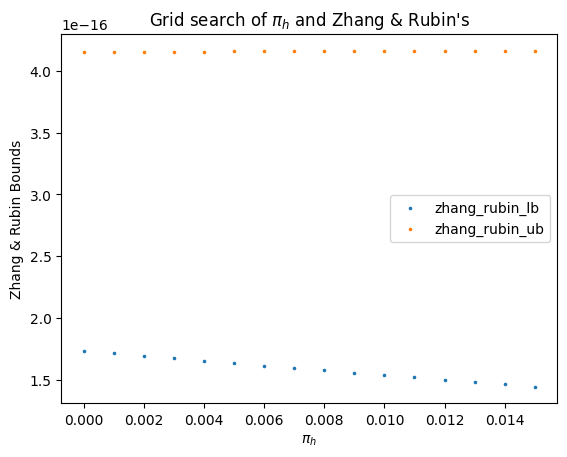

x is: -0.23


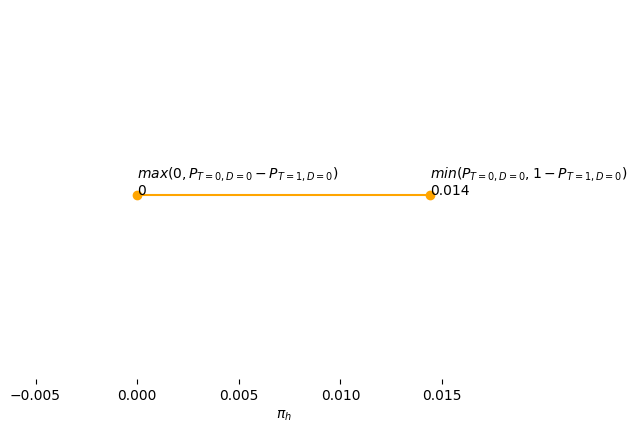

pi_h 0.0:
            LB: 1st intagral: -9.1 to -8.19. 2nd intagral: -9.548200047739549 to -8.55.
            UB: 1st intagral: -9.1 to -8.1. 2nd intagral: -9.548200047739549 to -8.55. 
            Zhang and Rubin bounds are [9.892167699679052e-17, 2.4354713670070395e-16]
            
pi_h 0.001:
            LB: 1st intagral: -9.1 to -8.19. 2nd intagral: -9.548200047739549 to -8.55.
            UB: 1st intagral: -9.1 to -8.1. 2nd intagral: -9.548200047739549 to -8.55. 
            Zhang and Rubin bounds are [9.771930853305524e-17, 2.436077568027257e-16]
            
pi_h 0.002:
            LB: 1st intagral: -9.1 to -8.19. 2nd intagral: -9.548200047739549 to -8.55.
            UB: 1st intagral: -9.1 to -8.1. 2nd intagral: -9.548200047739549 to -8.55. 
            Zhang and Rubin bounds are [9.652777168231648e-17, 2.4366787557438743e-16]
            
pi_h 0.003:
            LB: 1st intagral: -9.1 to -8.19. 2nd intagral: -9.548200047739549 to -8.55.
            UB: 1st intagral: -9.1 to -

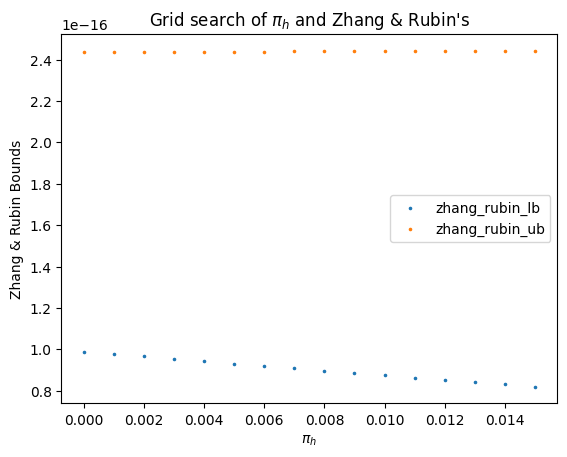

x is: -0.22


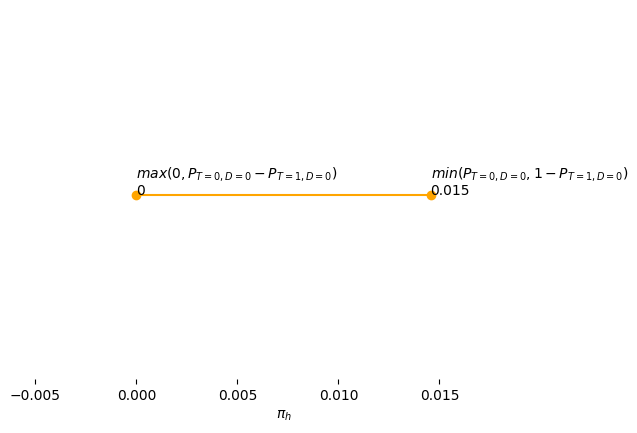

pi_h 0.0:
            LB: 1st intagral: -9.14 to -8.23. 2nd intagral: -9.569974225626739 to -8.57.
            UB: 1st intagral: -9.14 to -8.14. 2nd intagral: -9.569974225626739 to -8.57. 
            Zhang and Rubin bounds are [6.746104109236625e-17, 1.6953229165188568e-16]
            
pi_h 0.001:
            LB: 1st intagral: -9.14 to -8.23. 2nd intagral: -9.569974225626739 to -8.57.
            UB: 1st intagral: -9.14 to -8.14. 2nd intagral: -9.569974225626739 to -8.57. 
            Zhang and Rubin bounds are [6.662625091255269e-17, 1.695826652433832e-16]
            
pi_h 0.002:
            LB: 1st intagral: -9.14 to -8.24. 2nd intagral: -9.569974225626739 to -8.57.
            UB: 1st intagral: -9.14 to -8.14. 2nd intagral: -9.569974225626739 to -8.57. 
            Zhang and Rubin bounds are [6.579904336879856e-17, 1.6963262061720948e-16]
            
pi_h 0.003:
            LB: 1st intagral: -9.14 to -8.24. 2nd intagral: -9.569974225626739 to -8.57.
            UB: 1st intagral:

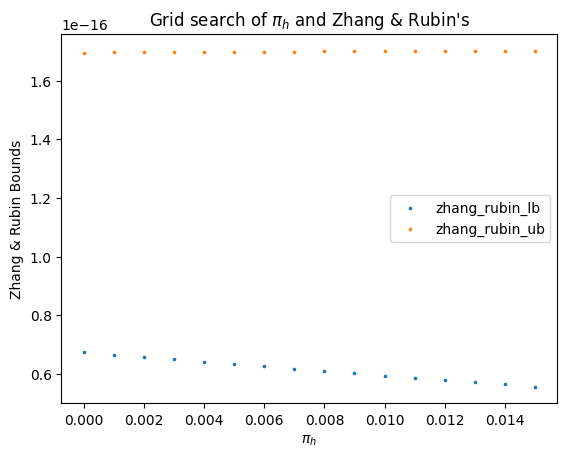

x is: -0.2


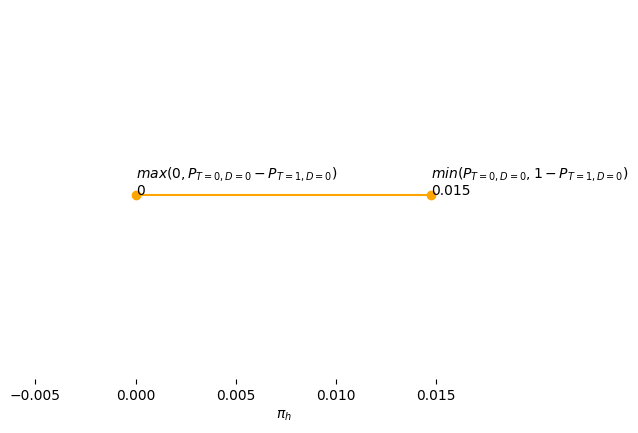

pi_h 0.0:
            LB: 1st intagral: -9.19 to -8.29. 2nd intagral: -9.596141270569738 to -8.6.
            UB: 1st intagral: -9.19 to -8.19. 2nd intagral: -9.596141270569738 to -8.6. 
            Zhang and Rubin bounds are [4.2324028919030383e-17, 1.0929726285156577e-16]
            
pi_h 0.001:
            LB: 1st intagral: -9.19 to -8.29. 2nd intagral: -9.596141270569738 to -8.6.
            UB: 1st intagral: -9.19 to -8.19. 2nd intagral: -9.596141270569738 to -8.6. 
            Zhang and Rubin bounds are [4.178704418749502e-17, 1.0933756243349995e-16]
            
pi_h 0.002:
            LB: 1st intagral: -9.19 to -8.29. 2nd intagral: -9.596141270569738 to -8.6.
            UB: 1st intagral: -9.19 to -8.19. 2nd intagral: -9.596141270569738 to -8.6. 
            Zhang and Rubin bounds are [4.1254985939995944e-17, 1.0937752586381447e-16]
            
pi_h 0.003:
            LB: 1st intagral: -9.19 to -8.29. 2nd intagral: -9.596141270569738 to -8.6.
            UB: 1st intagral: -9.

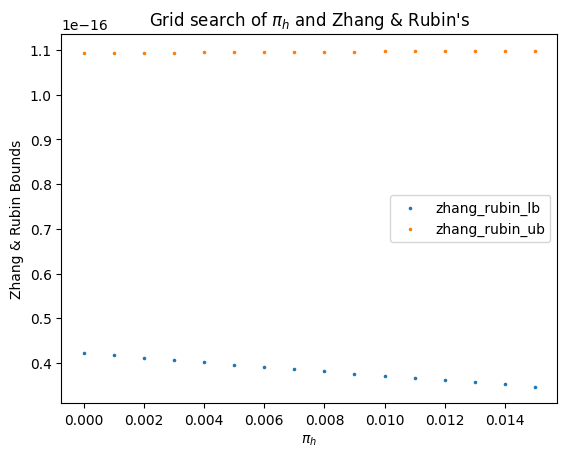

x is: -0.17
** including the non parametric bounds **


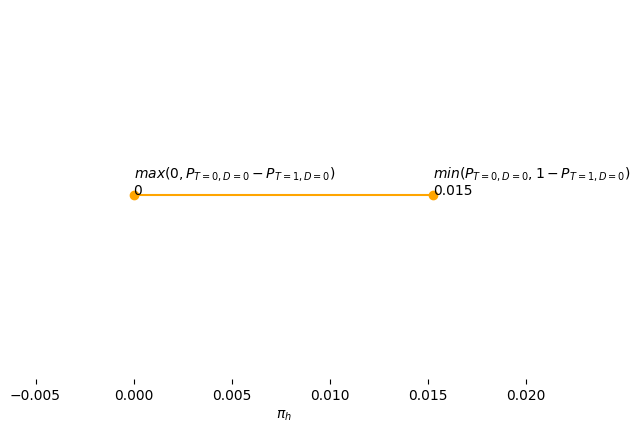

pi_h 0.0:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.669644012595116 to -8.67.
            UB: 1st intagral: -9.34 to -8.34. 2nd intagral: -9.669644012595116 to -8.67. 
            Zhang and Rubin bounds are [1.0890033129482705e-17, 3.108577777272434e-17]
            
pi_h 0.001:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.669644012595116 to -8.67.
            UB: 1st intagral: -9.34 to -8.34. 2nd intagral: -9.669644012595116 to -8.67. 
            Zhang and Rubin bounds are [1.0737004176709276e-17, 3.110723404197985e-17]
            
pi_h 0.002:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.669644012595116 to -8.67.
            UB: 1st intagral: -9.34 to -8.34. 2nd intagral: -9.669644012595116 to -8.67. 
            Zhang and Rubin bounds are [1.0585418720877627e-17, 3.11285089635158e-17]
            
pi_h 0.003:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.669644012595116 to -8.67.
            UB: 1st intagral:

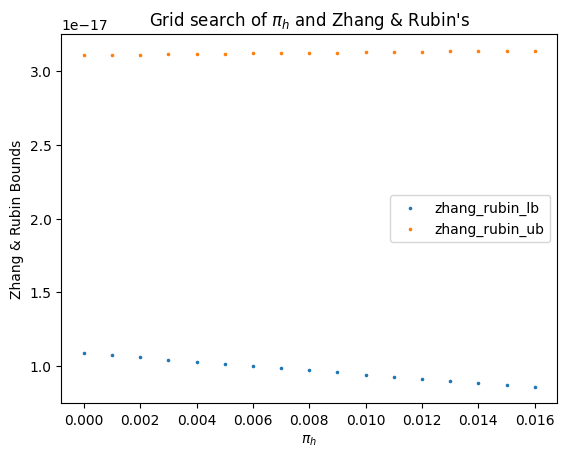

x is: -0.16
** including the non parametric bounds **


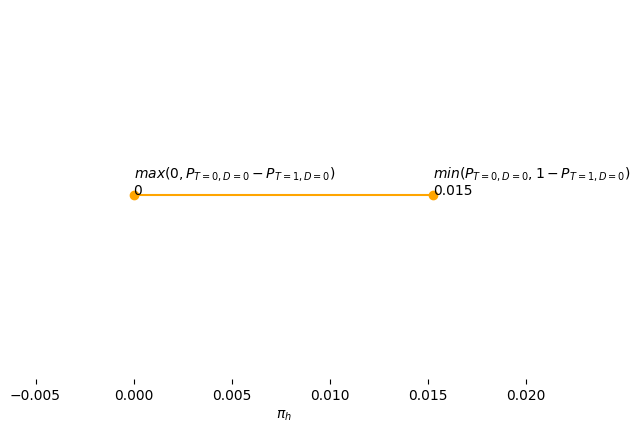

pi_h 0.0:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.670667983267979 to -8.67.
            UB: 1st intagral: -9.34 to -8.34. 2nd intagral: -9.670667983267979 to -8.67. 
            Zhang and Rubin bounds are [1.0679069282816263e-17, 3.053718777302012e-17]
            
pi_h 0.001:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.670667983267979 to -8.67.
            UB: 1st intagral: -9.34 to -8.34. 2nd intagral: -9.670667983267979 to -8.67. 
            Zhang and Rubin bounds are [1.0528718361768821e-17, 3.055845566768534e-17]
            
pi_h 0.002:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.670667983267979 to -8.67.
            UB: 1st intagral: -9.34 to -8.34. 2nd intagral: -9.670667983267979 to -8.67. 
            Zhang and Rubin bounds are [1.0379786183914734e-17, 3.057954377400964e-17]
            
pi_h 0.003:
            LB: 1st intagral: -9.34 to -8.44. 2nd intagral: -9.670667983267979 to -8.67.
            UB: 1st intagral

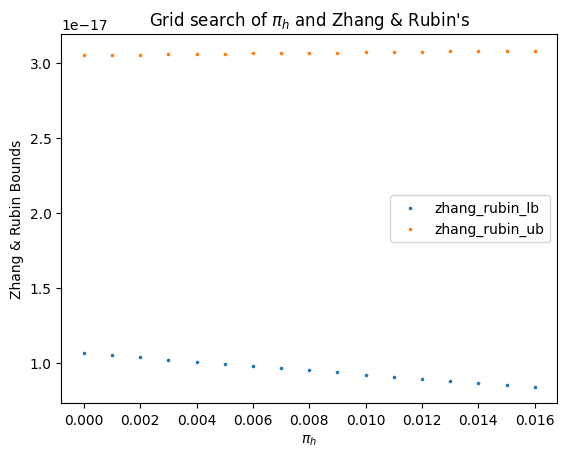

x is: -0.13


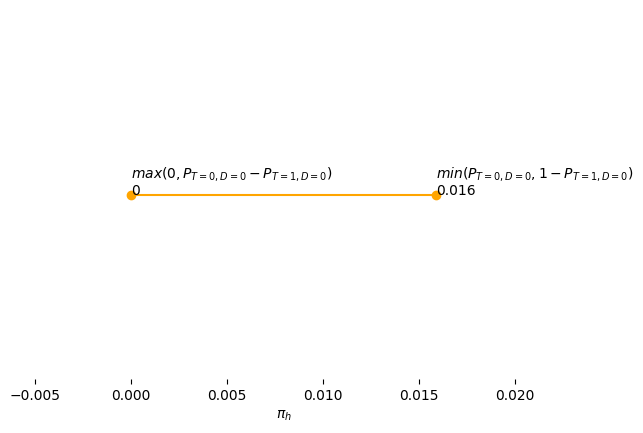

pi_h 0.0:
            LB: 1st intagral: -9.49 to -8.6. 2nd intagral: -9.747402810460718 to -8.75.
            UB: 1st intagral: -9.49 to -8.49. 2nd intagral: -9.747402810460718 to -8.75. 
            Zhang and Rubin bounds are [2.2620357056348986e-18, 7.80678489784385e-18]
            
pi_h 0.001:
            LB: 1st intagral: -9.49 to -8.6. 2nd intagral: -9.747402810460718 to -8.75.
            UB: 1st intagral: -9.49 to -8.49. 2nd intagral: -9.747402810460718 to -8.75. 
            Zhang and Rubin bounds are [2.2225141804367893e-18, 7.817736336505676e-18]
            
pi_h 0.002:
            LB: 1st intagral: -9.49 to -8.6. 2nd intagral: -9.747402810460718 to -8.75.
            UB: 1st intagral: -9.49 to -8.49. 2nd intagral: -9.747402810460718 to -8.75. 
            Zhang and Rubin bounds are [2.1833764819309143e-18, 7.828593911157095e-18]
            
pi_h 0.003:
            LB: 1st intagral: -9.49 to -8.6. 2nd intagral: -9.747402810460718 to -8.75.
            UB: 1st intagral: -9.

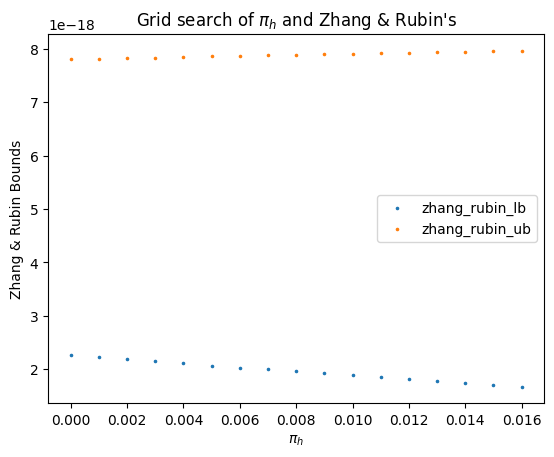

x is: 0.06


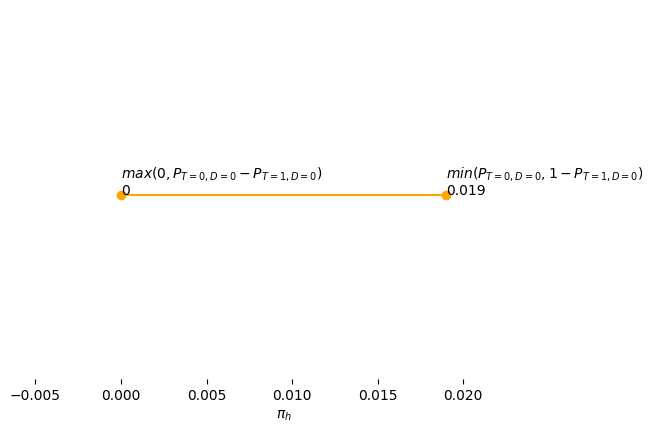

pi_h 0.0:
            LB: 1st intagral: -10.22 to -9.34. 2nd intagral: -10.111248433182483 to -9.11.
            UB: 1st intagral: -10.22 to -9.22. 2nd intagral: -10.111248433182483 to -9.11. 
            Zhang and Rubin bounds are [-3.275804494851523e-20, -2.3377992226351395e-20]
            
pi_h 0.001:
            LB: 1st intagral: -10.22 to -9.35. 2nd intagral: -10.111248433182483 to -9.11.
            UB: 1st intagral: -10.22 to -9.22. 2nd intagral: -10.111248433182483 to -9.11. 
            Zhang and Rubin bounds are [-3.2807191048627623e-20, -2.294260308895439e-20]
            
pi_h 0.002:
            LB: 1st intagral: -10.22 to -9.35. 2nd intagral: -10.111248433182483 to -9.11.
            UB: 1st intagral: -10.22 to -9.22. 2nd intagral: -10.111248433182483 to -9.11. 
            Zhang and Rubin bounds are [-3.2855790672677423e-20, -2.251120056878175e-20]
            
pi_h 0.003:
            LB: 1st intagral: -10.22 to -9.35. 2nd intagral: -10.111248433182483 to -9.11.
        

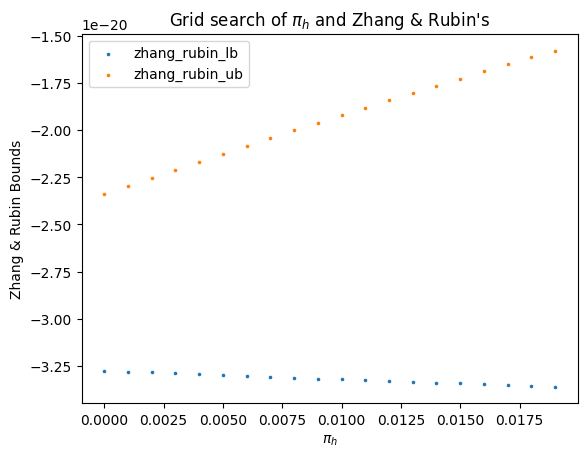

x is: 0.12


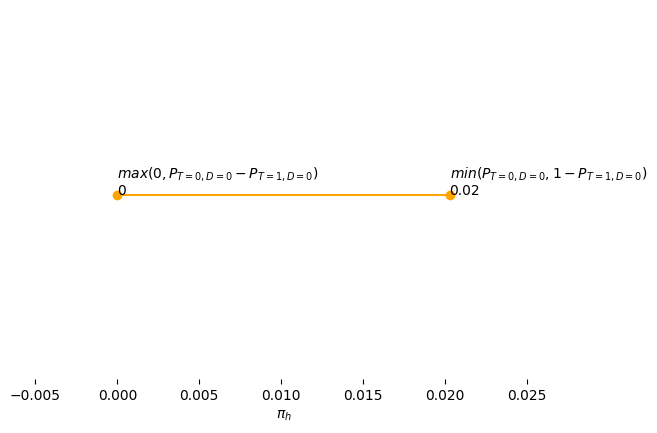

pi_h 0.0:
            LB: 1st intagral: -10.49 to -9.62. 2nd intagral: -10.2448911531301 to -9.24.
            UB: 1st intagral: -10.49 to -9.49. 2nd intagral: -10.2448911531301 to -9.24. 
            Zhang and Rubin bounds are [-1.0274131498963033e-20, -9.490519717545436e-21]
            
pi_h 0.001:
            LB: 1st intagral: -10.49 to -9.62. 2nd intagral: -10.2448911531301 to -9.24.
            UB: 1st intagral: -10.49 to -9.49. 2nd intagral: -10.2448911531301 to -9.25. 
            Zhang and Rubin bounds are [-1.0277760028769407e-20, -9.36156419519325e-21]
            
pi_h 0.002:
            LB: 1st intagral: -10.49 to -9.62. 2nd intagral: -10.2448911531301 to -9.24.
            UB: 1st intagral: -10.49 to -9.49. 2nd intagral: -10.2448911531301 to -9.25. 
            Zhang and Rubin bounds are [-1.0281346165613933e-20, -9.233818907057409e-21]
            
pi_h 0.003:
            LB: 1st intagral: -10.49 to -9.62. 2nd intagral: -10.2448911531301 to -9.24.
            UB: 1st int

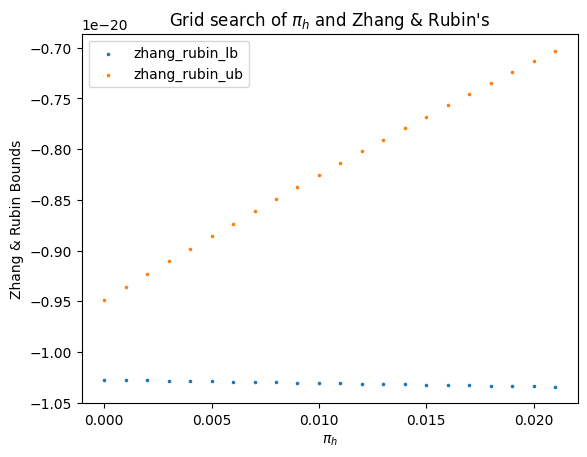

x is: 0.21


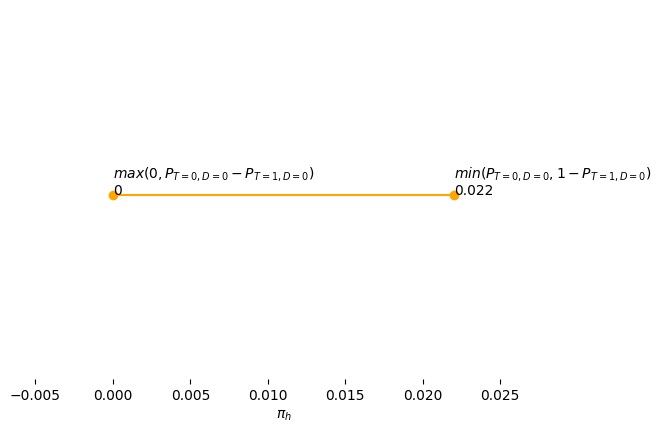

pi_h 0.0:
            LB: 1st intagral: -10.83 to -9.97. 2nd intagral: -10.41395066638582 to -9.41.
            UB: 1st intagral: -10.83 to -9.83. 2nd intagral: -10.41395066638582 to -9.41. 
            Zhang and Rubin bounds are [-2.1328537708752122e-21, -2.1023742951394227e-21]
            
pi_h 0.001:
            LB: 1st intagral: -10.83 to -9.97. 2nd intagral: -10.41395066638582 to -9.41.
            UB: 1st intagral: -10.83 to -9.83. 2nd intagral: -10.41395066638582 to -9.42. 
            Zhang and Rubin bounds are [-2.13297332167157e-21, -2.0753830983304507e-21]
            
pi_h 0.002:
            LB: 1st intagral: -10.83 to -9.97. 2nd intagral: -10.41395066638582 to -9.41.
            UB: 1st intagral: -10.83 to -9.83. 2nd intagral: -10.41395066638582 to -9.42. 
            Zhang and Rubin bounds are [-2.133091385372621e-21, -2.0486533277170584e-21]
            
pi_h 0.003:
            LB: 1st intagral: -10.83 to -9.97. 2nd intagral: -10.41395066638582 to -9.41.
            UB:

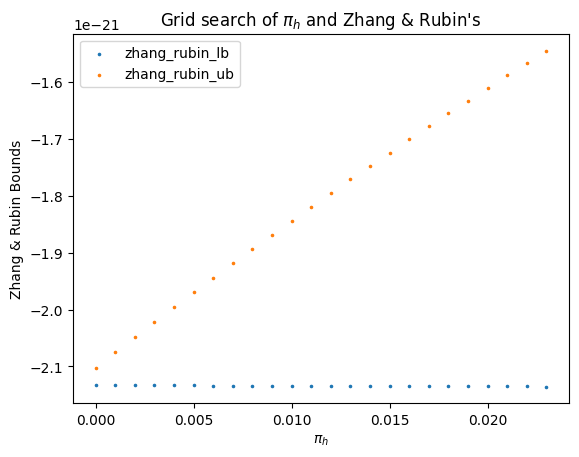

x is: 0.27


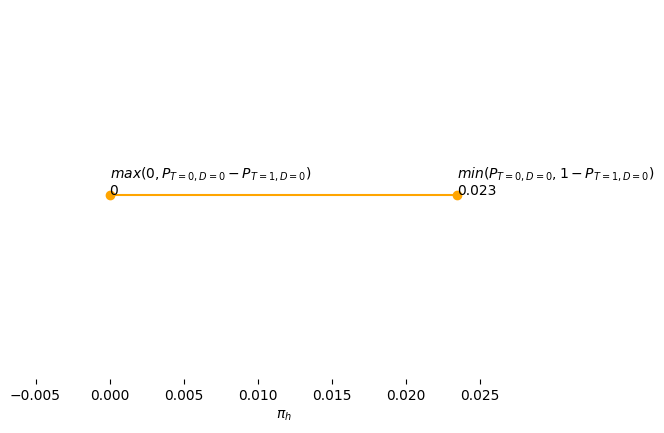

pi_h 0.0:
            LB: 1st intagral: -11.09 to -10.24. 2nd intagral: -10.54470945883293 to -9.54.
            UB: 1st intagral: -11.09 to -10.09. 2nd intagral: -10.54470945883293 to -9.54. 
            Zhang and Rubin bounds are [-6.1194288051427095e-22, -6.09663028206441e-22]
            
pi_h 0.001:
            LB: 1st intagral: -11.09 to -10.24. 2nd intagral: -10.54470945883293 to -9.54.
            UB: 1st intagral: -11.09 to -10.09. 2nd intagral: -10.54470945883293 to -9.55. 
            Zhang and Rubin bounds are [-6.1195067986771295e-22, -6.017622122483758e-22]
            
pi_h 0.002:
            LB: 1st intagral: -11.09 to -10.24. 2nd intagral: -10.54470945883293 to -9.54.
            UB: 1st intagral: -11.09 to -10.09. 2nd intagral: -10.54470945883293 to -9.55. 
            Zhang and Rubin bounds are [-6.119583773714813e-22, -5.939398357264237e-22]
            
pi_h 0.003:
            LB: 1st intagral: -11.09 to -10.24. 2nd intagral: -10.54470945883293 to -9.54.
          

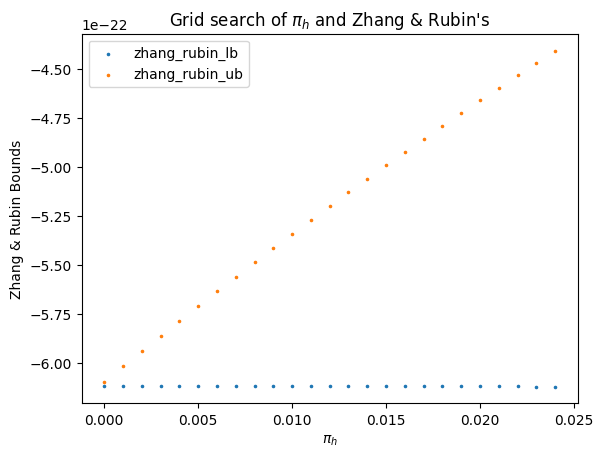

x is: 0.3
** including the non parametric bounds **


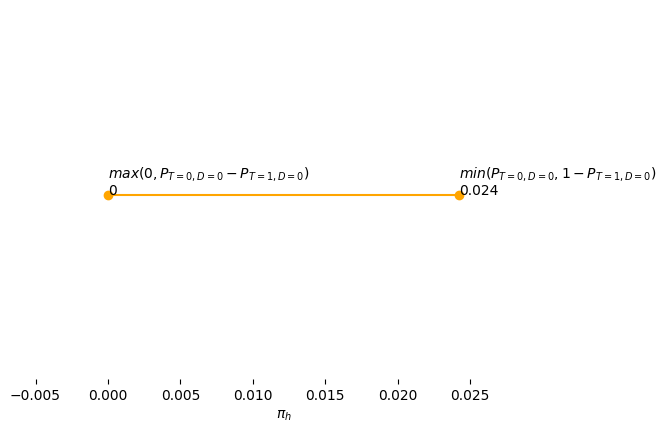

pi_h 0.0:
            LB: 1st intagral: -11.22 to -10.37. 2nd intagral: -10.609166594367759 to -9.61.
            UB: 1st intagral: -11.22 to -10.22. 2nd intagral: -10.609166594367759 to -9.61. 
            Zhang and Rubin bounds are [-3.28297036541319e-22, -3.2767842874130375e-22]
            
pi_h 0.001:
            LB: 1st intagral: -11.22 to -10.37. 2nd intagral: -10.609166594367759 to -9.61.
            UB: 1st intagral: -11.22 to -10.22. 2nd intagral: -10.609166594367759 to -9.61. 
            Zhang and Rubin bounds are [-3.2829900895734254e-22, -3.2339265449012937e-22]
            
pi_h 0.002:
            LB: 1st intagral: -11.22 to -10.38. 2nd intagral: -10.609166594367759 to -9.61.
            UB: 1st intagral: -11.22 to -10.22. 2nd intagral: -10.609166594367759 to -9.61. 
            Zhang and Rubin bounds are [-3.2830095498849827e-22, -3.191499560691792e-22]
            
pi_h 0.003:
            LB: 1st intagral: -11.22 to -10.38. 2nd intagral: -10.609166594367759 to -9.61.
 

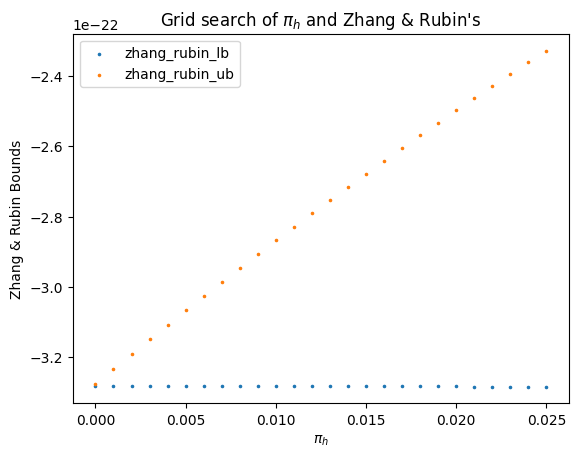

x is: 0.33


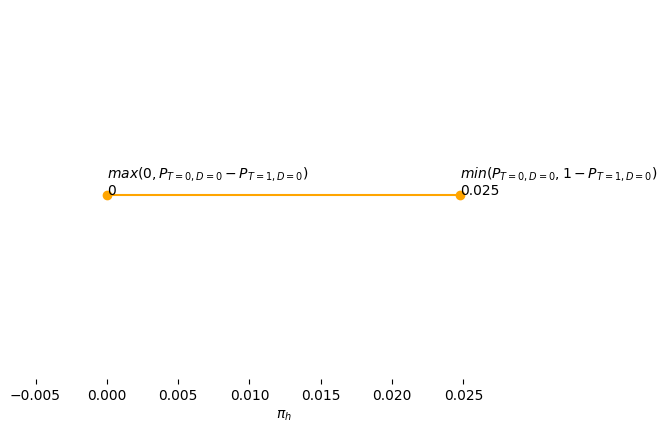

pi_h 0.0:
            LB: 1st intagral: -1.31 to -0.47. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.31 to -0.31. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.001:
            LB: 1st intagral: -1.31 to -0.47. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.31 to -0.31. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.002:
            LB: 1st intagral: -1.31 to -0.47. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.31 to -0.31. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.003:
            LB: 1st intagral: -1.31 to -0.47. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.31 to -0.31. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.004:
            LB: 1st intagral: -1.31 to -0.47. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.31 to

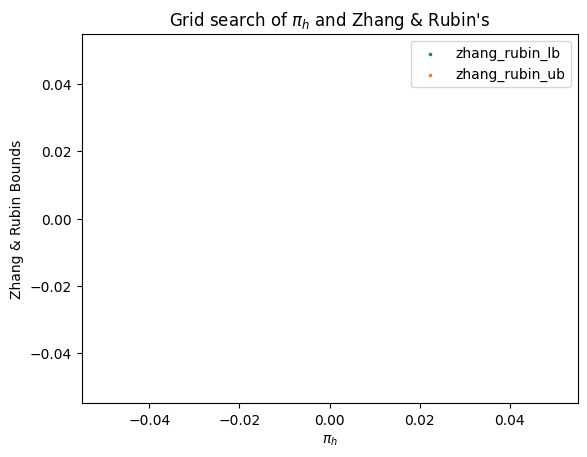

x is: 0.36


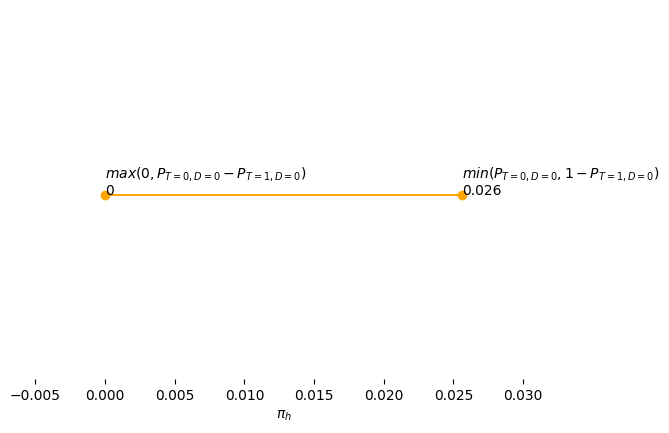

pi_h 0.0:
            LB: 1st intagral: -1.44 to -0.61. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.44 to -0.44. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.001:
            LB: 1st intagral: -1.44 to -0.61. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.44 to -0.44. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.002:
            LB: 1st intagral: -1.44 to -0.61. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.44 to -0.44. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.003:
            LB: 1st intagral: -1.44 to -0.61. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.44 to -0.44. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.004:
            LB: 1st intagral: -1.44 to -0.61. 2nd intagral: nan to nan.
            UB: 1st intagral: -1.44 to

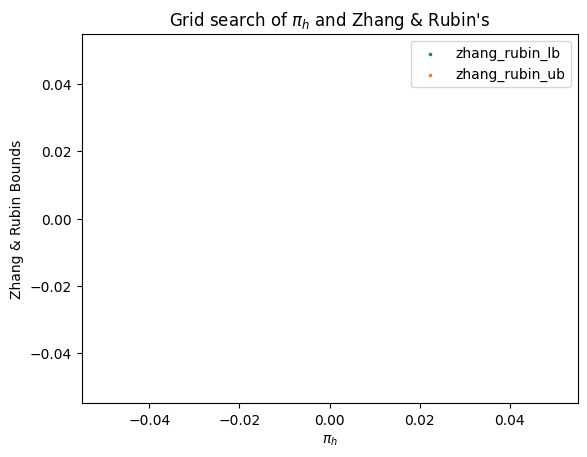

x is: 0.46


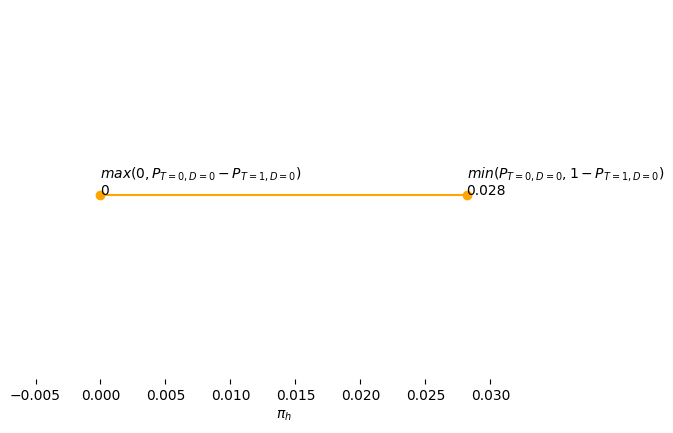

pi_h 0.0:
            LB: 1st intagral: -11.84 to -11.02. 2nd intagral: -10.918032914609586 to -9.92.
            UB: 1st intagral: -11.84 to -10.84. 2nd intagral: -10.918032914609586 to -9.92. 
            Zhang and Rubin bounds are [-1.5658698549752294e-23, -1.565775958774814e-23]
            
pi_h 0.001:
            LB: 1st intagral: -11.84 to -11.02. 2nd intagral: -10.918032914609586 to -9.92.
            UB: 1st intagral: -11.84 to -10.84. 2nd intagral: -10.918032914609586 to -9.92. 
            Zhang and Rubin bounds are [-1.5658700620548352e-23, -1.5441452058618985e-23]
            
pi_h 0.002:
            LB: 1st intagral: -11.84 to -11.02. 2nd intagral: -10.918032914609586 to -9.92.
            UB: 1st intagral: -11.84 to -10.84. 2nd intagral: -10.918032914609586 to -9.92. 
            Zhang and Rubin bounds are [-1.5658702660215723e-23, -1.522745336882332e-23]
            
pi_h 0.003:
            LB: 1st intagral: -11.84 to -11.02. 2nd intagral: -10.918032914609586 to -9.92.


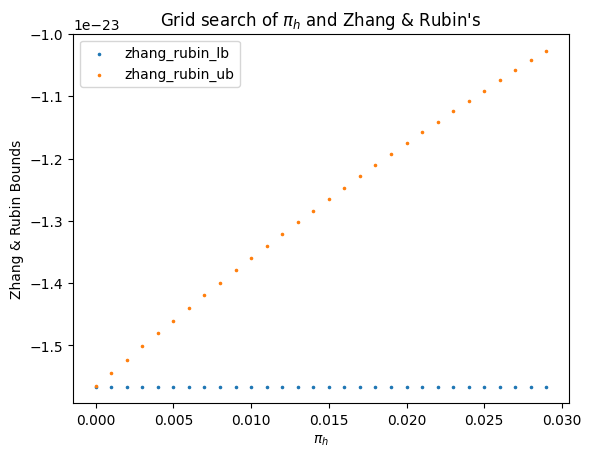

x is: 0.52


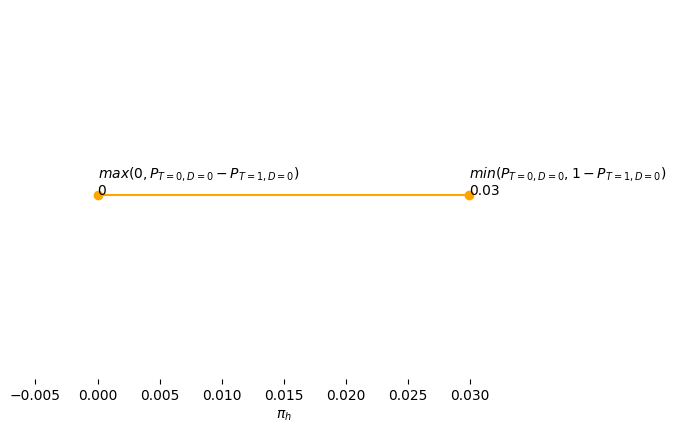

pi_h 0.0:
            LB: 1st intagral: -12.09 to -11.28. 2nd intagral: -11.042819224175581 to -10.04.
            UB: 1st intagral: -12.09 to -11.09. 2nd intagral: -11.042819224175581 to -10.04. 
            Zhang and Rubin bounds are [-4.4578199405788174e-24, -4.4577589918902704e-24]
            
pi_h 0.001:
            LB: 1st intagral: -12.09 to -11.28. 2nd intagral: -11.042819224175581 to -10.04.
            UB: 1st intagral: -12.09 to -11.09. 2nd intagral: -11.042819224175581 to -10.04. 
            Zhang and Rubin bounds are [-4.4578200544600474e-24, -4.394688728568997e-24]
            
pi_h 0.002:
            LB: 1st intagral: -12.09 to -11.28. 2nd intagral: -11.042819224175581 to -10.04.
            UB: 1st intagral: -12.09 to -11.09. 2nd intagral: -11.042819224175581 to -10.05. 
            Zhang and Rubin bounds are [-4.457820166545451e-24, -4.332308660494342e-24]
            
pi_h 0.003:
            LB: 1st intagral: -12.09 to -11.28. 2nd intagral: -11.042819224175581 to -1

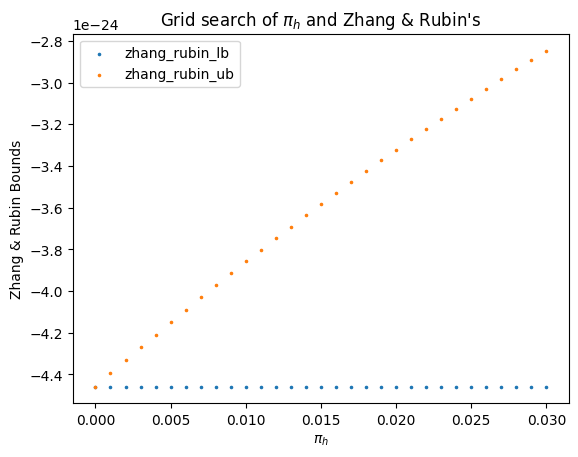

x is: 0.53
** including the non parametric bounds **


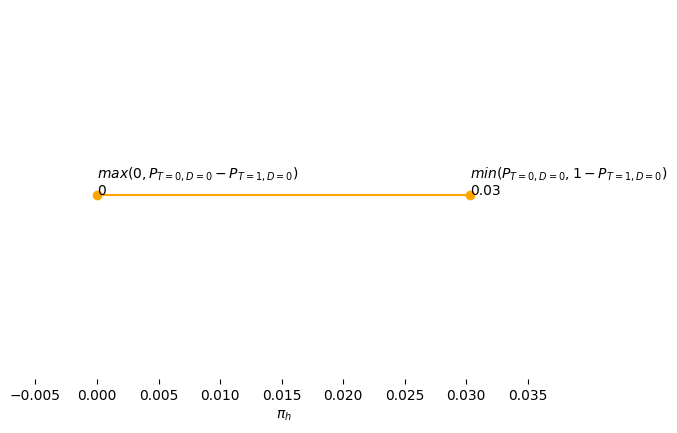

pi_h 0.0:
            LB: 1st intagral: -12.14 to -11.33. 2nd intagral: -11.068933576636892 to -10.07.
            UB: 1st intagral: -12.14 to -11.14. 2nd intagral: -11.068933576636892 to -10.07. 
            Zhang and Rubin bounds are [-3.420477033739908e-24, -3.420442925246751e-24]
            
pi_h 0.001:
            LB: 1st intagral: -12.14 to -11.33. 2nd intagral: -11.068933576636892 to -10.07.
            UB: 1st intagral: -12.14 to -11.14. 2nd intagral: -11.068933576636892 to -10.07. 
            Zhang and Rubin bounds are [-3.420477095212362e-24, -3.3718028498485404e-24]
            
pi_h 0.002:
            LB: 1st intagral: -12.14 to -11.33. 2nd intagral: -11.068933576636892 to -10.07.
            UB: 1st intagral: -12.14 to -11.14. 2nd intagral: -11.068933576636892 to -10.07. 
            Zhang and Rubin bounds are [-3.420477155705587e-24, -3.323697867747716e-24]
            
pi_h 0.003:
            LB: 1st intagral: -12.14 to -11.34. 2nd intagral: -11.068933576636892 to -10.

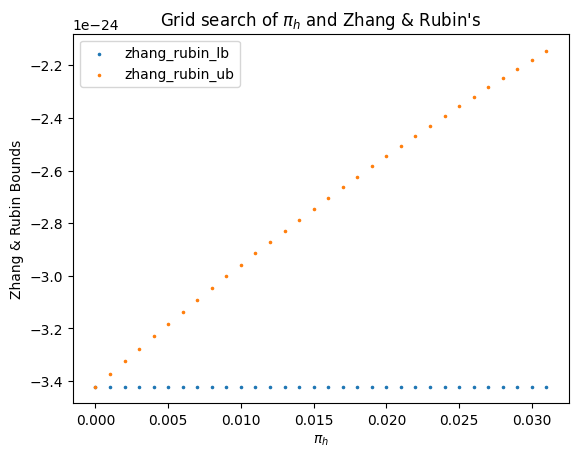

x is: 0.54


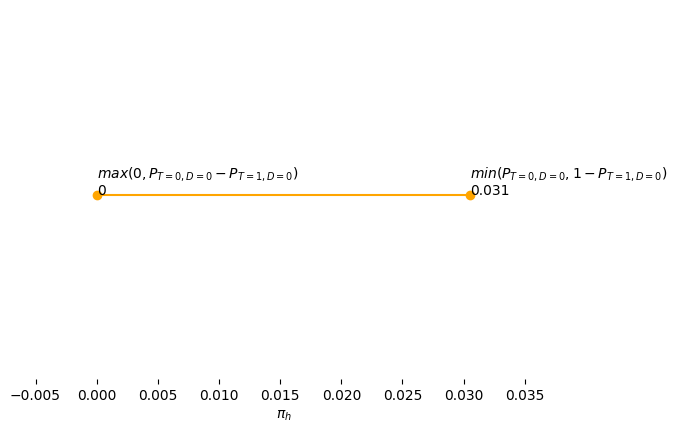

pi_h 0.0:
            LB: 1st intagral: -12.17 to -11.37. 2nd intagral: -11.084972296132712 to -10.08.
            UB: 1st intagral: -12.17 to -11.17. 2nd intagral: -11.084972296132712 to -10.08. 
            Zhang and Rubin bounds are [-2.905956094953525e-24, -2.905932248733582e-24]
            
pi_h 0.001:
            LB: 1st intagral: -12.17 to -11.37. 2nd intagral: -11.084972296132712 to -10.08.
            UB: 1st intagral: -12.17 to -11.17. 2nd intagral: -11.084972296132712 to -10.09. 
            Zhang and Rubin bounds are [-2.9059561369783087e-24, -2.8644791791692945e-24]
            
pi_h 0.002:
            LB: 1st intagral: -12.17 to -11.37. 2nd intagral: -11.084972296132712 to -10.08.
            UB: 1st intagral: -12.17 to -11.17. 2nd intagral: -11.084972296132712 to -10.09. 
            Zhang and Rubin bounds are [-2.9059561783294886e-24, -2.823483619284382e-24]
            
pi_h 0.003:
            LB: 1st intagral: -12.17 to -11.37. 2nd intagral: -11.084972296132712 to -1

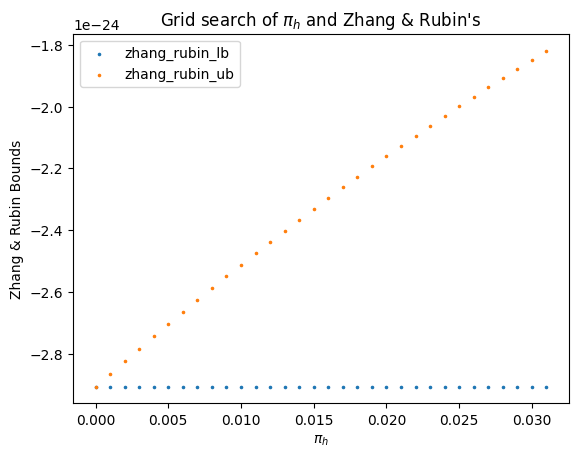

x is: 0.61


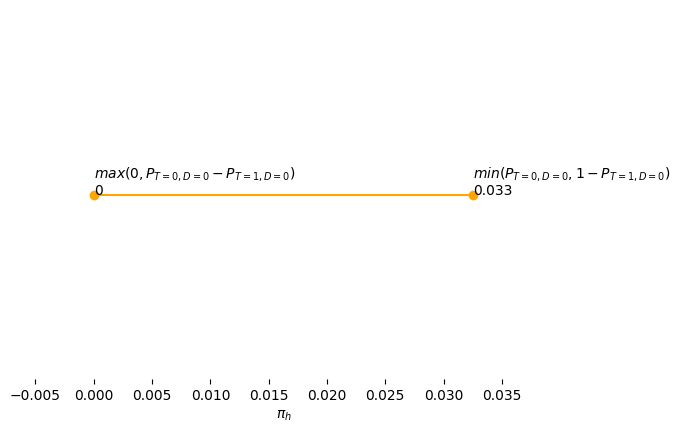

pi_h 0.0:
            LB: 1st intagral: -12.43 to -11.64. 2nd intagral: -11.215538834941015 to -10.22.
            UB: 1st intagral: -12.43 to -11.43. 2nd intagral: -11.215538834941015 to -10.22. 
            Zhang and Rubin bounds are [-7.635178608955971e-25, -7.635166170159094e-25]
            
pi_h 0.001:
            LB: 1st intagral: -12.43 to -11.64. 2nd intagral: -11.215538834941015 to -10.22.
            UB: 1st intagral: -12.43 to -11.43. 2nd intagral: -11.215538834941015 to -10.22. 
            Zhang and Rubin bounds are [-7.635178627087693e-25, -7.52339748448802e-25]
            
pi_h 0.002:
            LB: 1st intagral: -12.43 to -11.64. 2nd intagral: -11.215538834941015 to -10.22.
            UB: 1st intagral: -12.43 to -11.43. 2nd intagral: -11.215538834941015 to -10.22. 
            Zhang and Rubin bounds are [-7.635178644913595e-25, -7.412895712402696e-25]
            
pi_h 0.003:
            LB: 1st intagral: -12.43 to -11.64. 2nd intagral: -11.215538834941015 to -10.22

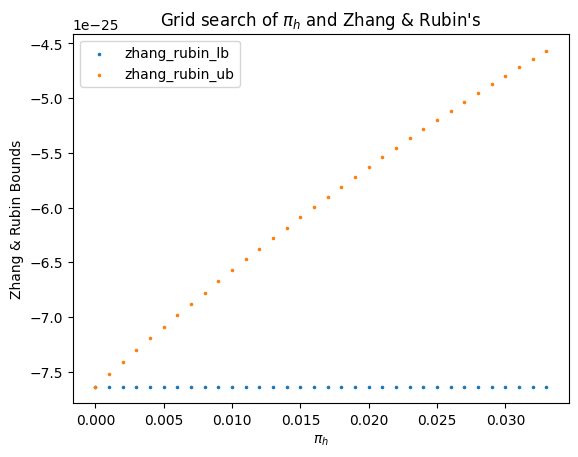

x is: 0.65


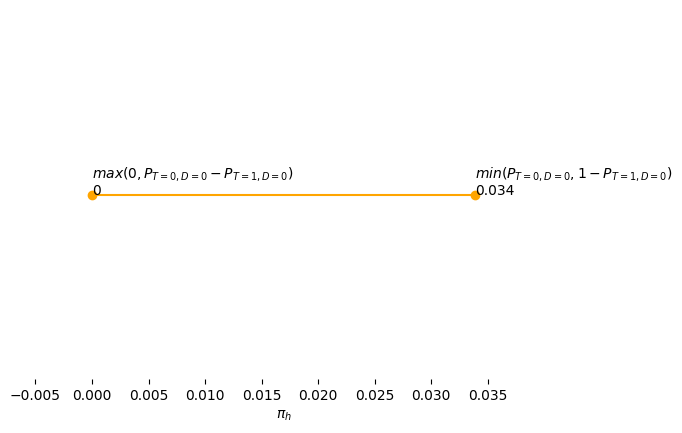

pi_h 0.0:
            LB: 1st intagral: -12.6 to -11.81. 2nd intagral: -11.298068279199716 to -10.3.
            UB: 1st intagral: -12.6 to -11.6. 2nd intagral: -11.298068279199716 to -10.3. 
            Zhang and Rubin bounds are [-3.2517698101851485e-25, -3.2517679556589646e-25]
            
pi_h 0.001:
            LB: 1st intagral: -12.6 to -11.81. 2nd intagral: -11.298068279199716 to -10.3.
            UB: 1st intagral: -12.6 to -11.6. 2nd intagral: -11.298068279199716 to -10.3. 
            Zhang and Rubin bounds are [-3.2517698125656655e-25, -3.203364780141389e-25]
            
pi_h 0.002:
            LB: 1st intagral: -12.6 to -11.82. 2nd intagral: -11.298068279199716 to -10.3.
            UB: 1st intagral: -12.6 to -11.6. 2nd intagral: -11.298068279199716 to -10.3. 
            Zhang and Rubin bounds are [-3.2517698149046996e-25, -3.1555197297332444e-25]
            
pi_h 0.003:
            LB: 1st intagral: -12.6 to -11.82. 2nd intagral: -11.298068279199716 to -10.3.
         

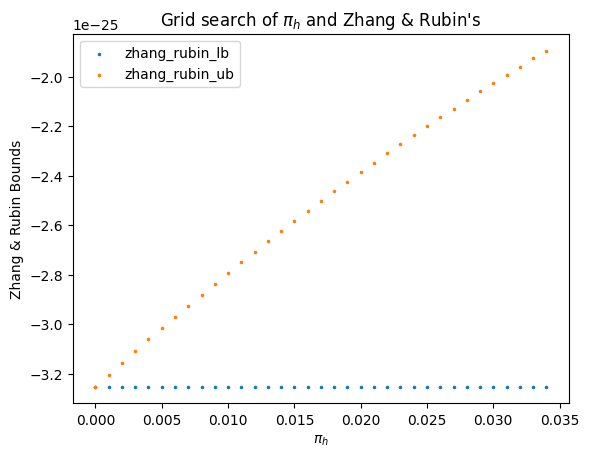

x is: 0.68
** including the non parametric bounds **


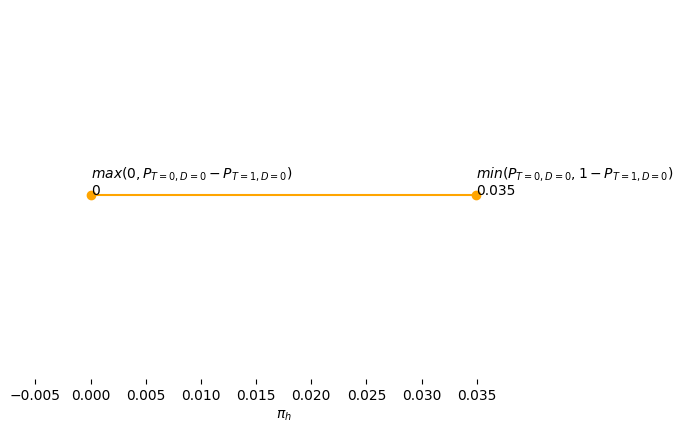

pi_h 0.0:
            LB: 1st intagral: -12.73 to -11.95. 2nd intagral: -11.364384682464406 to -10.36.
            UB: 1st intagral: -12.73 to -11.73. 2nd intagral: -11.364384682464406 to -10.36. 
            Zhang and Rubin bounds are [-1.6297330558798453e-25, -1.6297326621399514e-25]
            
pi_h 0.001:
            LB: 1st intagral: -12.73 to -11.95. 2nd intagral: -11.364384682464406 to -10.36.
            UB: 1st intagral: -12.73 to -11.73. 2nd intagral: -11.364384682464406 to -10.37. 
            Zhang and Rubin bounds are [-1.6297330563341947e-25, -1.6051410093825958e-25]
            
pi_h 0.002:
            LB: 1st intagral: -12.73 to -11.96. 2nd intagral: -11.364384682464406 to -10.36.
            UB: 1st intagral: -12.73 to -11.73. 2nd intagral: -11.364384682464406 to -10.37. 
            Zhang and Rubin bounds are [-1.6297330567804151e-25, -1.5808368849877378e-25]
            
pi_h 0.003:
            LB: 1st intagral: -12.73 to -11.96. 2nd intagral: -11.364384682464406 to

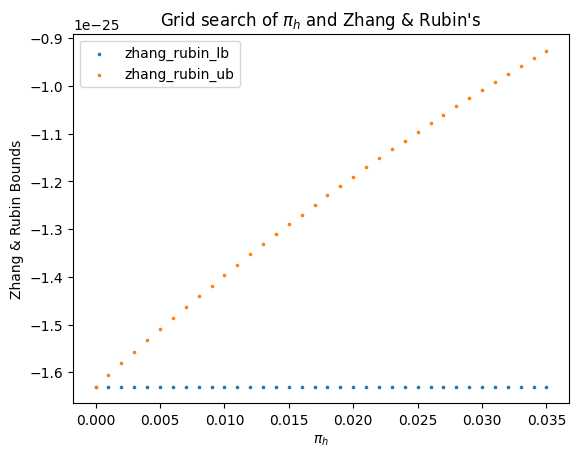

x is: 0.68


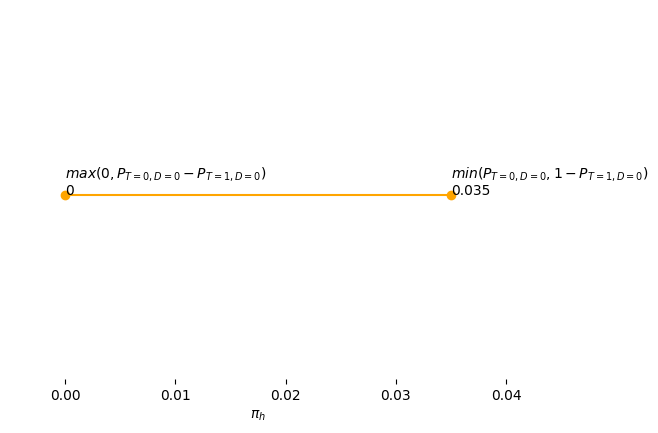

pi_h 0.0:
            LB: 1st intagral: -12.73 to -11.96. 2nd intagral: -11.366488030171096 to -10.37.
            UB: 1st intagral: -12.73 to -11.73. 2nd intagral: -11.366488030171096 to -10.37. 
            Zhang and Rubin bounds are [-1.5943008613381699e-25, -1.594300486594523e-25]
            
pi_h 0.001:
            LB: 1st intagral: -12.73 to -11.96. 2nd intagral: -11.366488030171096 to -10.37.
            UB: 1st intagral: -12.73 to -11.73. 2nd intagral: -11.366488030171096 to -10.37. 
            Zhang and Rubin bounds are [-1.5943008617691123e-25, -1.5702330118803347e-25]
            
pi_h 0.002:
            LB: 1st intagral: -12.73 to -11.96. 2nd intagral: -11.366488030171096 to -10.37.
            UB: 1st intagral: -12.73 to -11.73. 2nd intagral: -11.366488030171096 to -10.37. 
            Zhang and Rubin bounds are [-1.594300862192338e-25, -1.546447061774392e-25]
            
pi_h 0.003:
            LB: 1st intagral: -12.73 to -11.96. 2nd intagral: -11.366488030171096 to -1

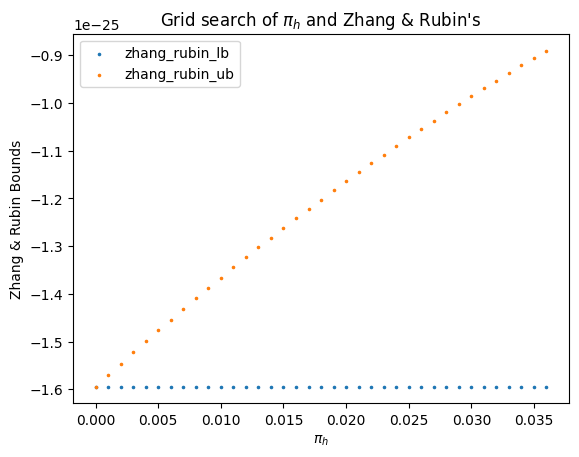

x is: 0.72


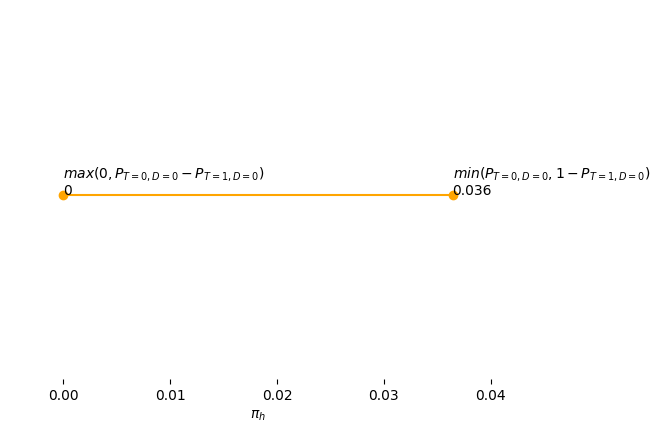

pi_h 0.0:
            LB: 1st intagral: -2.9 to -2.13. 2nd intagral: nan to nan.
            UB: 1st intagral: -2.9 to -1.9. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.001:
            LB: 1st intagral: -2.9 to -2.13. 2nd intagral: nan to nan.
            UB: 1st intagral: -2.9 to -1.9. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.002:
            LB: 1st intagral: -2.9 to -2.13. 2nd intagral: nan to nan.
            UB: 1st intagral: -2.9 to -1.9. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.003:
            LB: 1st intagral: -2.9 to -2.14. 2nd intagral: nan to nan.
            UB: 1st intagral: -2.9 to -1.9. 2nd intagral: nan to nan. 
            Zhang and Rubin bounds are [nan, nan]
            
pi_h 0.004:
            LB: 1st intagral: -2.9 to -2.14. 2nd intagral: nan to nan.
            UB: 1st intagral: -2.9 to -1.9. 2nd int

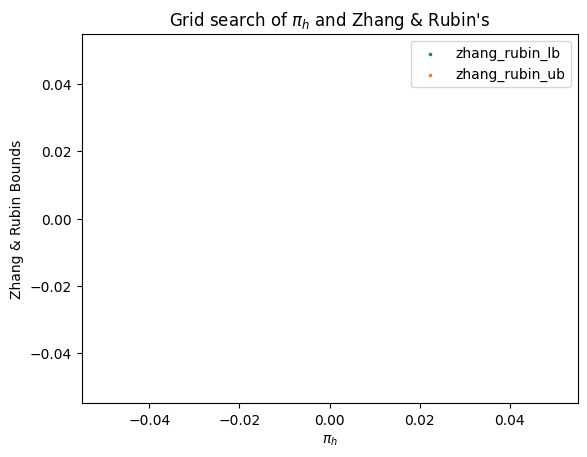

x is: 0.74


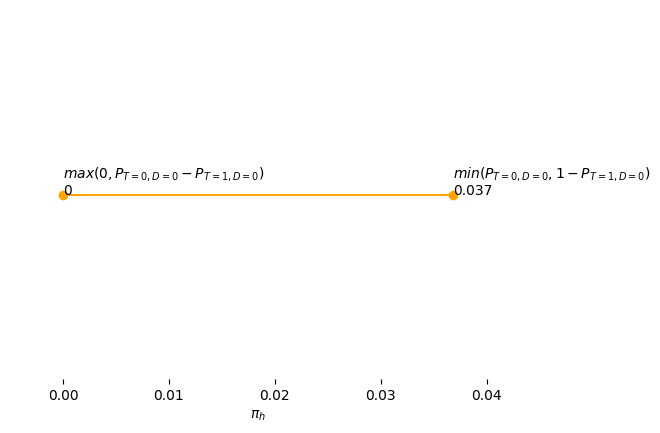

pi_h 0.0:
            LB: 1st intagral: -12.94 to -12.18. 2nd intagral: -11.470808391676956 to -10.47.
            UB: 1st intagral: -12.94 to -11.94. 2nd intagral: -11.470808391676956 to -10.47. 
            Zhang and Rubin bounds are [-5.329797645870773e-26, -5.32979733059529e-26]
            
pi_h 0.001:
            LB: 1st intagral: -12.94 to -12.18. 2nd intagral: -11.470808391676956 to -10.47.
            UB: 1st intagral: -12.94 to -11.94. 2nd intagral: -11.470808391676956 to -10.47. 
            Zhang and Rubin bounds are [-5.329797646174786e-26, -5.24756376586075e-26]
            
pi_h 0.002:
            LB: 1st intagral: -12.94 to -12.18. 2nd intagral: -11.470808391676956 to -10.47.
            UB: 1st intagral: -12.94 to -11.94. 2nd intagral: -11.470808391676956 to -10.47. 
            Zhang and Rubin bounds are [-5.329797646473122e-26, -5.166313652350723e-26]
            
pi_h 0.003:
            LB: 1st intagral: -12.94 to -12.18. 2nd intagral: -11.470808391676956 to -10.47.

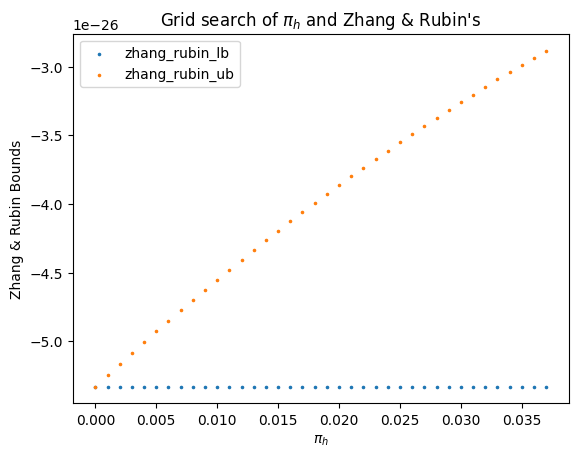

x is: 0.74


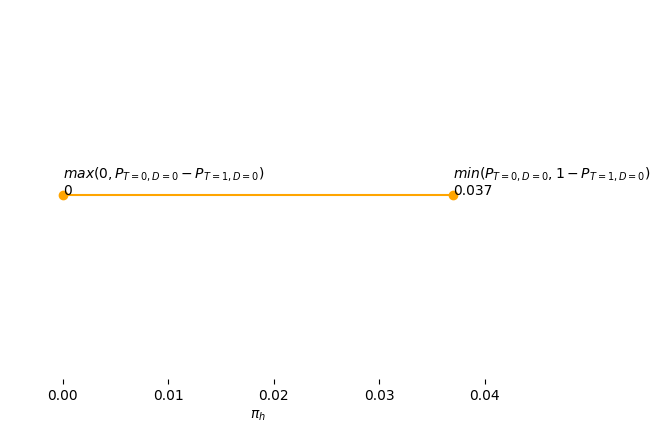

pi_h 0.0:
            LB: 1st intagral: -12.96 to -12.2. 2nd intagral: -11.481601852423347 to -10.48.
            UB: 1st intagral: -12.96 to -11.96. 2nd intagral: -11.481601852423347 to -10.48. 
            Zhang and Rubin bounds are [-4.755631232754232e-26, -4.755630989337524e-26]
            
pi_h 0.001:
            LB: 1st intagral: -12.96 to -12.2. 2nd intagral: -11.481601852423347 to -10.48.
            UB: 1st intagral: -12.96 to -11.96. 2nd intagral: -11.481601852423347 to -10.48. 
            Zhang and Rubin bounds are [-4.7556312329845747e-26, -4.6820883719794904e-26]
            
pi_h 0.002:
            LB: 1st intagral: -12.96 to -12.2. 2nd intagral: -11.481601852423347 to -10.48.
            UB: 1st intagral: -12.96 to -11.96. 2nd intagral: -11.481601852423347 to -10.48. 
            Zhang and Rubin bounds are [-4.755631233210597e-26, -4.609427304456962e-26]
            
pi_h 0.003:
            LB: 1st intagral: -12.96 to -12.2. 2nd intagral: -11.481601852423347 to -10.48.

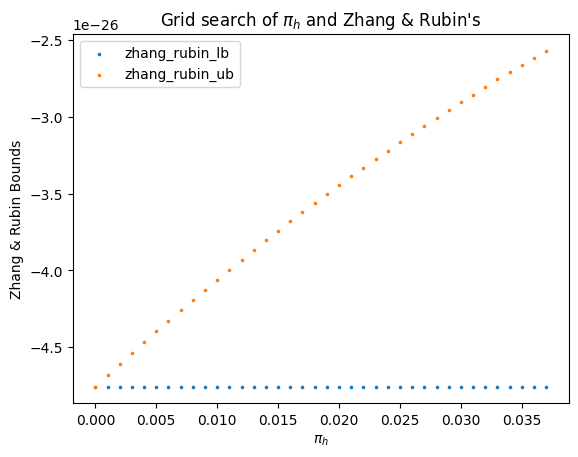

x is: 0.83


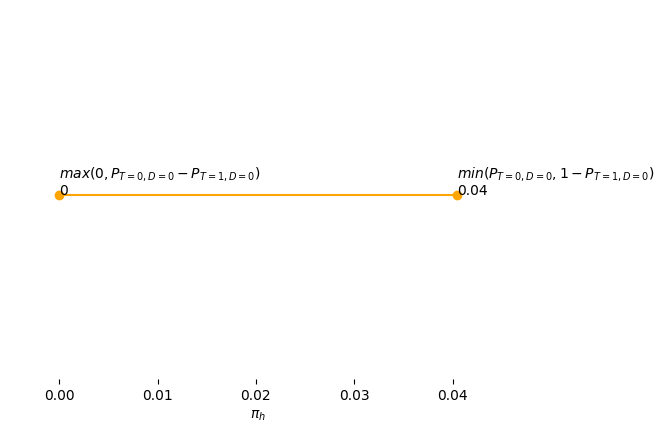

pi_h 0.0:
            LB: 1st intagral: -13.33 to -12.59. 2nd intagral: -11.665682178128264 to -10.67.
            UB: 1st intagral: -13.33 to -12.33. 2nd intagral: -11.665682178128264 to -10.67. 
            Zhang and Rubin bounds are [-6.686750190364378e-27, -6.686750162921834e-27]
            
pi_h 0.001:
            LB: 1st intagral: -13.33 to -12.59. 2nd intagral: -11.665682178128264 to -10.67.
            UB: 1st intagral: -13.33 to -12.33. 2nd intagral: -11.665682178128264 to -10.67. 
            Zhang and Rubin bounds are [-6.686750190382859e-27, -6.579146100210075e-27]
            
pi_h 0.002:
            LB: 1st intagral: -13.33 to -12.59. 2nd intagral: -11.665682178128264 to -10.67.
            UB: 1st intagral: -13.33 to -12.33. 2nd intagral: -11.665682178128264 to -10.67. 
            Zhang and Rubin bounds are [-6.686750190400966e-27, -6.472884559564264e-27]
            
pi_h 0.003:
            LB: 1st intagral: -13.33 to -12.59. 2nd intagral: -11.665682178128264 to -10.6

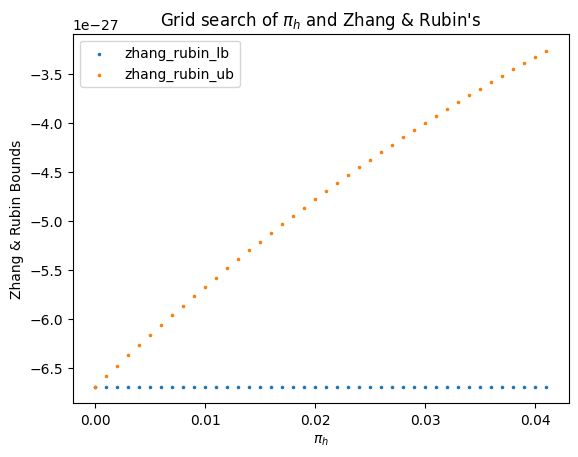

x is: 0.85


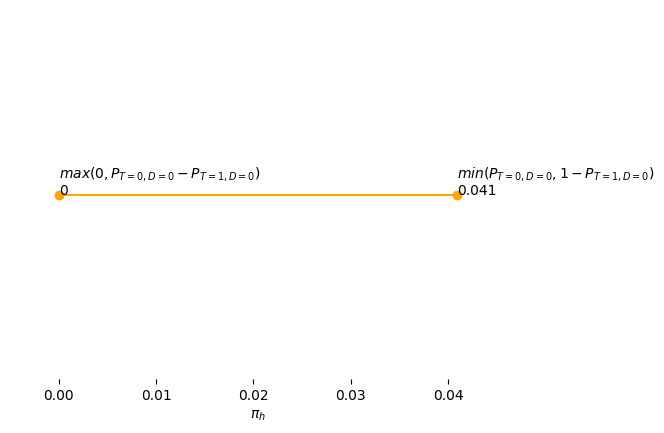

pi_h 0.0:
            LB: 1st intagral: -13.39 to -12.65. 2nd intagral: -11.693198033079717 to -10.69.
            UB: 1st intagral: -13.39 to -12.39. 2nd intagral: -11.693198033079717 to -10.69. 
            Zhang and Rubin bounds are [-4.972851907401568e-27, -4.972851893531749e-27]
            
pi_h 0.001:
            LB: 1st intagral: -13.39 to -12.65. 2nd intagral: -11.693198033079717 to -10.69.
            UB: 1st intagral: -13.39 to -12.39. 2nd intagral: -11.693198033079717 to -10.69. 
            Zhang and Rubin bounds are [-4.972851907410417e-27, -4.892339681198376e-27]
            
pi_h 0.002:
            LB: 1st intagral: -13.39 to -12.65. 2nd intagral: -11.693198033079717 to -10.69.
            UB: 1st intagral: -13.39 to -12.39. 2nd intagral: -11.693198033079717 to -10.7. 
            Zhang and Rubin bounds are [-4.9728519074190845e-27, -4.8128381098131075e-27]
            
pi_h 0.003:
            LB: 1st intagral: -13.39 to -12.65. 2nd intagral: -11.693198033079717 to -10.

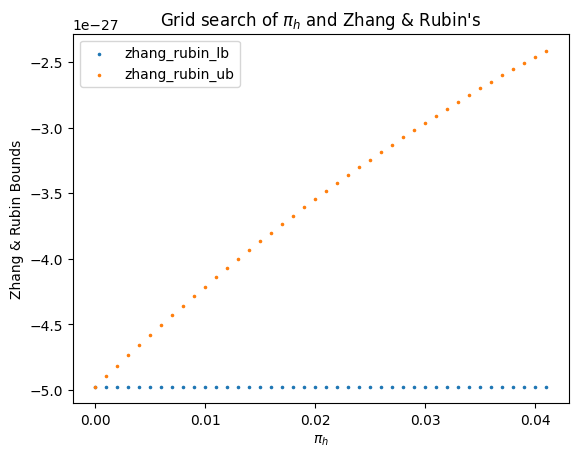

x is: 0.9


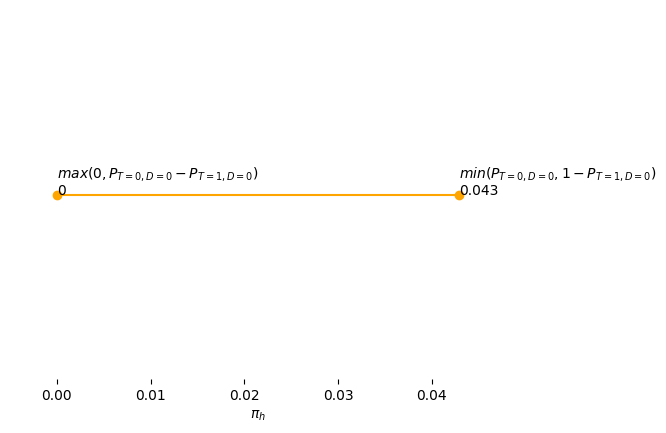

pi_h 0.0:
            LB: 1st intagral: -13.58 to -12.85. 2nd intagral: -11.790260505296171 to -10.79.
            UB: 1st intagral: -13.58 to -12.58. 2nd intagral: -11.790260505296171 to -10.79. 
            Zhang and Rubin bounds are [-1.739103566109934e-27, -1.7391035648910935e-27]
            
pi_h 0.001:
            LB: 1st intagral: -13.58 to -12.86. 2nd intagral: -11.790260505296171 to -10.79.
            UB: 1st intagral: -13.58 to -12.58. 2nd intagral: -11.790260505296171 to -10.79. 
            Zhang and Rubin bounds are [-1.7391035661105717e-27, -1.7103274955622708e-27]
            
pi_h 0.002:
            LB: 1st intagral: -13.58 to -12.86. 2nd intagral: -11.790260505296171 to -10.79.
            UB: 1st intagral: -13.58 to -12.58. 2nd intagral: -11.790260505296171 to -10.79. 
            Zhang and Rubin bounds are [-1.739103566111196e-27, -1.6819205622113528e-27]
            
pi_h 0.003:
            LB: 1st intagral: -13.58 to -12.86. 2nd intagral: -11.790260505296171 to -

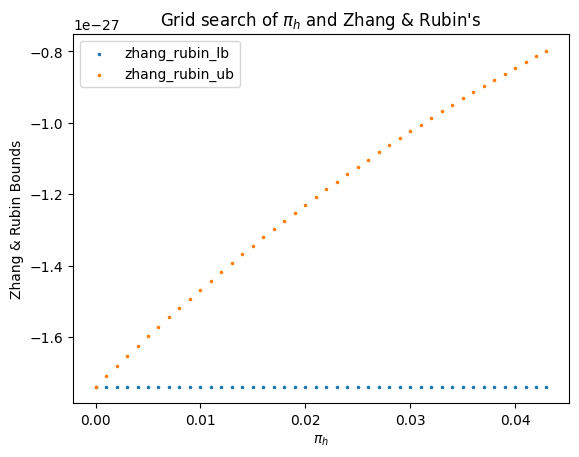

x is: 0.95


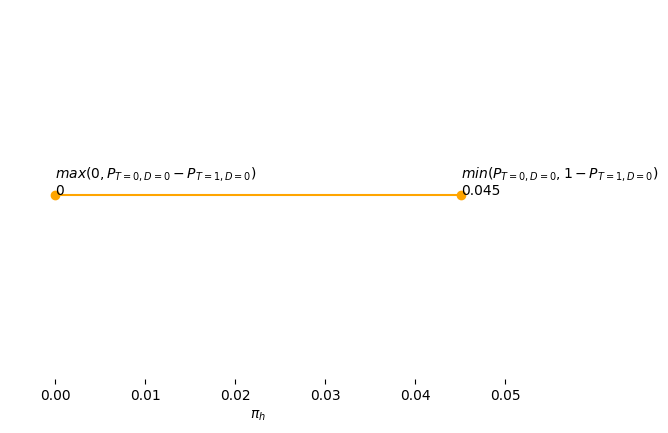

pi_h 0.0:
            LB: 1st intagral: -13.79 to -13.07. 2nd intagral: -11.892578845707634 to -10.89.
            UB: 1st intagral: -13.79 to -12.79. 2nd intagral: -11.892578845707634 to -10.89. 
            Zhang and Rubin bounds are [-5.687704835764815e-28, -5.687704834864151e-28]
            
pi_h 0.001:
            LB: 1st intagral: -13.79 to -13.07. 2nd intagral: -11.892578845707634 to -10.89.
            UB: 1st intagral: -13.79 to -12.79. 2nd intagral: -11.892578845707634 to -10.89. 
            Zhang and Rubin bounds are [-5.687704835765192e-28, -5.591360579945578e-28]
            
pi_h 0.002:
            LB: 1st intagral: -13.79 to -13.08. 2nd intagral: -11.892578845707634 to -10.89.
            UB: 1st intagral: -13.79 to -12.79. 2nd intagral: -11.892578845707634 to -10.9. 
            Zhang and Rubin bounds are [-5.687704835765562e-28, -5.496281286111315e-28]
            
pi_h 0.003:
            LB: 1st intagral: -13.79 to -13.08. 2nd intagral: -11.892578845707634 to -10.89

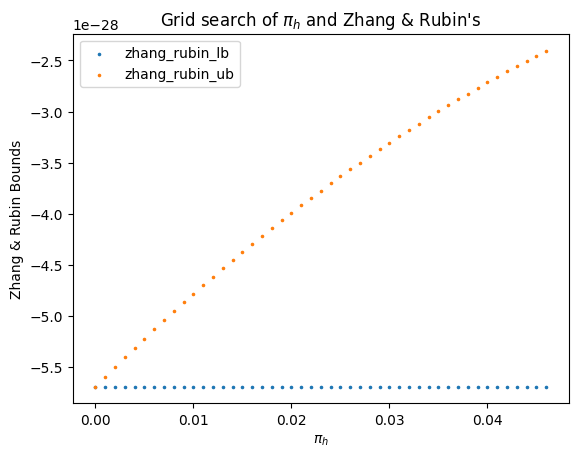

In [18]:
def pi_h_and_bounds_plots_controller(df: pd.DataFrame) -> None:
    df_for_analysis = df.sample(n=40, random_state=1).sort_values(by="x")
    for i,row in df_for_analysis.iterrows():
        print(f"x is: {round(row.x,2)}")
        calc_non_parametric = not(i % 10)
        if calc_non_parametric: 
            print("** including the non parametric bounds **")
        calc_zhang_rubin_bounds_per_x(x=row.x, plot_and_print=True, mu_y_0_x=row.mu0, mu_y_1_x=row.mu1, sigma_0=row.sigma_0, sigma_1=row.sigma_1, a0=row.a0, b0=row.b0, c0=row.c0, a1=row.a1, b1=row.b1, c1=row.c1, beta_d=row.beta_d, calc_non_parametric=calc_non_parametric)
    # zr_as_cate_bound_for_given_x = calc_zhang_rubin_bounds_per_x(x=0.0065, plot_and_print=True, beta_d = [5.0, -10.0, 6.0])

pi_h_and_bounds_plots_controller(sample_for_y_dist)

TODO - Note that some pi's don't have the integral solution <br>
TODO - check the $\mu$ inside the integral vs outside, should be the same (for given bounds)<br>

##### Parametric bounds

In [20]:
def calc_zhang_rubin_bounds(df: pd.DataFrame) -> List[Tuple[float, float]]:
    list_of_bounds = list()
    for index, row in df.iterrows():
        if index%10000==0:
            print(f"row {index} out of {df.shape[0]}")
        if row.D_obs==0: #NEW!!
            bound = calc_zhang_rubin_bounds_per_x(x=row.x, mu_y_0_x=row.mu0, mu_y_1_x=row.mu1, sigma_0=row.sigma_0, sigma_1=row.sigma_1,  a0=row.a0, b0=row.b0, c0=row.c0, a1=row.a1, b1=row.b1, c1=row.c1, beta_d=row.beta_d, pi_h_step=0.01)
        list_of_bounds.append(bound)
    return list_of_bounds
zhang_rubin_bounds = calc_zhang_rubin_bounds(sample_for_y_dist)

row 0 out of 10000


/Users/hadarrosenwald/Downloads/technion/thesis/competing_risks_simulation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  
/Users/hadarrosenwald/Downloads/technion/thesis/competing_risks_simulation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: All-NaN axis encountered
/Users/hadarrosenwald/Downloads/technion/thesis/competing_risks_simulation/venv/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: All-NaN axis encountered


lower bound: (1.8414861104214908e-16, -1.5163925563853798e-27, -1.4175150230827156e-23, -2.564409481914486e-21, 1.0333630762662187e-10, 1.0346710591224652e-10, 1.0346710591224652e-10, -5.684374191365923e-26, -2.336771066989538e-21, -3.6794022286905157e-23, 6.835360566161613e-08, -6.554959521714611e-28, -2.338519895284996e-25, 4.3970998272009e-12, 2.6109489052063407e-11, 2.3966240771071682e-11, 1.8532981482229994e-14, 1.8532981482229994e-14, 2.416209460880133e-18, 4.1675142820109493e-14, -1.5542180484091161e-21, 2.4359643511113296e-10, 3.9381391323356257e-14, 3.224759378227668e-16, 1.330882233856842e-19, -1.6459560604319763e-24, 9.822369226634924e-12, -5.2042235941535275e-20, -3.245935864086755e-21, 2.171124822967362e-08, -1.830993604288849e-21, 4.795279029131183e-11, 9.261919284392213e-09, -1.642027419284069e-27, -1.642027419284069e-27, -1.642027419284069e-27, 1.810585918329829e-14, 1.967662332459465e-09, nan, 1.117396366027865e-18, 5.908624683800869e-10, -8.622092952100063e-20, 3.7266

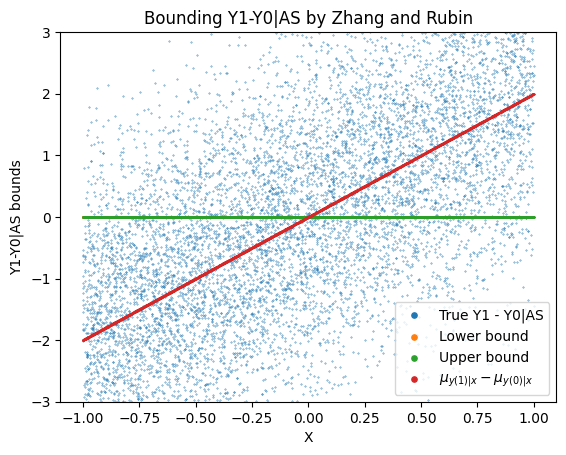

In [21]:
def plot_zhang_rubin_bounds(df: pd.DataFrame, zhang_rubin_bounds: List[Tuple[float, float]],
                            y0_dist_param: Dict[str, float] = y0_dist_param_default,
                            y1_dist_param: Dict[str, float] = y1_dist_param_default):


    df_plot_as = df.loc[df.stratum==Strata.AS.name]    
    plt.scatter(df_plot_as.x, (df_plot_as.Y1 - df_plot_as.Y0), label = "True Y1 - Y0|AS" , s=0.1)
    

    mu_y_0_x = df.mu0
    mu_y_1_x = df.mu1

    lb, up = zip(*zhang_rubin_bounds)
    print(f"lower bound: {lb}, upper bound: {up}, true value: {mu_y_1_x-mu_y_0_x}")
    plt.scatter(list(df.x), lb, label = "Lower bound", s=0.1)
    plt.scatter(list(df.x), up, label = "Upper bound", s=0.1)
    plt.scatter(list(df.x), mu_y_1_x-mu_y_0_x, label = r'$\mu_{y(1)|x}-\mu_{y(0)|x}$', s=0.1)

    plt.legend(markerscale=12)
    # plt.legend()
    plt.title("Bounding Y1-Y0|AS by Zhang and Rubin")
    plt.xlabel('X')
    plt.ylabel('Y1-Y0|AS bounds')
    plt.ylim((min(-3,min(lb)),max(3,max(up))))
    plt.show()
    return {'lb': lb, 'up': up, 'true value': mu_y_1_x-mu_y_0_x}
d = plot_zhang_rubin_bounds(sample_for_y_dist, zhang_rubin_bounds)

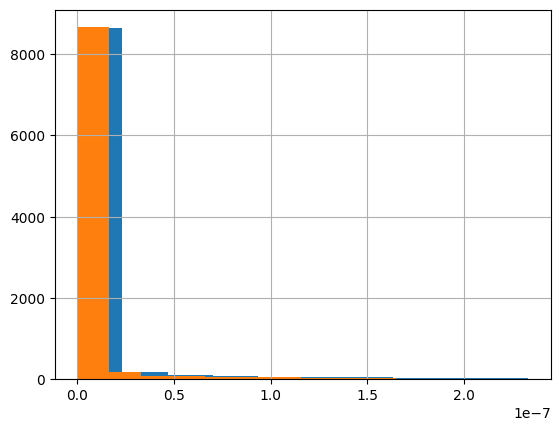

In [22]:
pd.Series(d['up']).hist()
pd.Series(d['lb']).hist()

In [23]:
# check that the bounds bounded the expected value correctly
for i,true in enumerate(d['true value']):
    if true>d['up'][i] or true<d['lb'][i]:
        print(f"bad {i}")


bad 0
bad 1
bad 2
bad 3
bad 4
bad 5
bad 7
bad 8
bad 9
bad 10
bad 11
bad 12
bad 13
bad 14
bad 15
bad 16
bad 18
bad 19
bad 20
bad 21
bad 22
bad 23
bad 24
bad 25
bad 26
bad 27
bad 28
bad 29
bad 30
bad 31
bad 32
bad 33
bad 36
bad 37
bad 39
bad 40
bad 41
bad 42
bad 43
bad 44
bad 46
bad 47
bad 48
bad 49
bad 50
bad 52
bad 54
bad 56
bad 57
bad 58
bad 59
bad 60
bad 61
bad 62
bad 63
bad 65
bad 66
bad 67
bad 68
bad 70
bad 71
bad 72
bad 73
bad 74
bad 75
bad 76
bad 77
bad 78
bad 79
bad 80
bad 81
bad 82
bad 83
bad 84
bad 85
bad 86
bad 87
bad 88
bad 89
bad 90
bad 91
bad 92
bad 93
bad 94
bad 95
bad 96
bad 97
bad 98
bad 99
bad 100
bad 101
bad 102
bad 103
bad 104
bad 105
bad 106
bad 108
bad 109
bad 111
bad 112
bad 113
bad 114
bad 115
bad 116
bad 117
bad 118
bad 119
bad 120
bad 123
bad 124
bad 125
bad 126
bad 127
bad 128
bad 129
bad 130
bad 131
bad 132
bad 133
bad 134
bad 135
bad 136
bad 137
bad 138
bad 139
bad 141
bad 142
bad 143
bad 144
bad 145
bad 147
bad 148
bad 149
bad 150
bad 151
bad 152
bad 153
ba

In [24]:
# d['x']=sample_for_y_dist.x
# pd.DataFrame(d)
# pd.DataFrame(d).lb.min()

# SCATE(x)

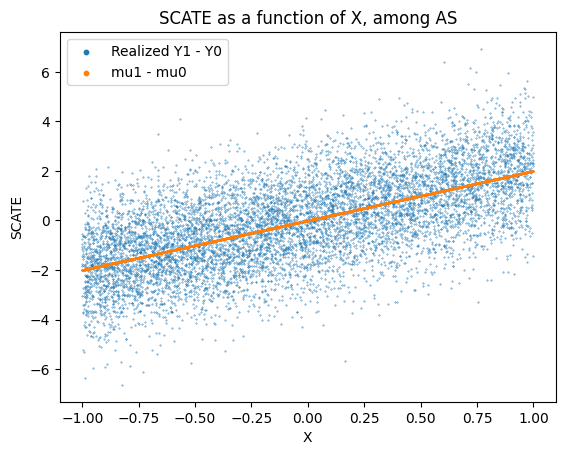

In [25]:
def plot_scate(df: pd.DataFrame,
               y0_dist_param_for_scate: Dict[str,float] = y0_dist_param_default,
               y1_dist_param_for_scate: Dict[str,float] = y1_dist_param_default):
    df_plot_as = df.loc[df.stratum==Strata.AS.name]  
    mu0 = df_plot_as.mu0
    mu1 = df_plot_as.mu1
    plt.scatter(df_plot_as.x, np.array(df_plot_as.Y1 - df_plot_as.Y0), label = "Realized Y1 - Y0", s=0.1)
    # plt.scatter(df_plot_as.x, np.array(df_plot_as.Y1 - df_plot_as.Y0), label = "Bounded Y1-Y0", s=0.1) TODO
    plt.scatter(df_plot_as.x, mu1 - mu0, label = "mu1 - mu0", s=0.1)
    plt.legend(markerscale=10)
    plt.title("SCATE as a function of X, among AS")
    plt.xlabel('X')
    plt.ylabel('SCATE')
    plt.show()

plot_scate(sample_for_y_dist)

TODO also here - do we want $\bar{Y_1}|AS-\bar{Y_0}|AS$ as function of descrete groups of X? <br>
-> + add Zhang & Rubin

# CATE(x) on D

In [26]:
sample_for_D_CATE = create_sample()

In [27]:
def plot_cate_on_d(omega_for_cate: float= omega_default, beta_d_for_cate: List[float] = beta_d_default):
    D0_prob = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_d_for_cate[0] + beta_d_for_cate[1]*0 + beta_d_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])
    D1_prob = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_d_for_cate[0] + beta_d_for_cate[1]*1 + beta_d_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])

    beta_hat_for_cate = estimate_beta_d_from_realizations(beta_d_for_cate, sample_for_D_CATE)
    D0_prob_hat = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_hat_for_cate[0] + beta_hat_for_cate[1]*0 + beta_hat_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])
    D1_prob_hat = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_hat_for_cate[0] + beta_hat_for_cate[1]*1 + beta_hat_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])

    plt.scatter(sample_for_D_CATE.x, np.array(sample_for_D_CATE.loc[sample_for_D_CATE.t==1].D1 - sample_for_D_CATE.loc[sample_for_D_CATE.t==0].D0), label = "D^obs among t=1 and t=0", s=0.1)
    plt.scatter(sample_for_D_CATE.x, np.array(sample_for_D_CATE.D1 - sample_for_D_CATE.D0), label = "Realized D1 - D0", s=0.1)
    plt.scatter(sample_for_D_CATE.x, D1_prob_hat - D0_prob_hat, label = "E^[D1|x] - E^[D0|x]", s=0.1)
    plt.scatter(sample_for_D_CATE.x, D1_prob - D0_prob, label = "E[D1|x] - E[D0|x]", s=0.1)
    plt.legend(markerscale=10)
    plt.title("CATE (on D) as a function of X")
    plt.xlabel('X')
    plt.ylabel('CATE on D')
    plt.show()

plot_cate_on_d()


NameError: name 'estimate_beta_d_from_realizations' is not defined

D1-D0 can either be: 1, 0, -1. should we average on same group of x?